In [8]:
!pip install python-weather
!pip install meteostat
!pip install geopandas
!pip install geopy
!pip install pgeocode
!pip install pyowm
!pip install wwo-hist
!pip install openweathermap_requests
!pip install holidays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import matplotlib.pyplot as plt
from datetime import datetime
from meteostat import Point, Daily
from geopy.geocoders import Nominatim
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import pgeocode
import numpy as np
import pyowm
from wwo_hist import retrieve_hist_data
from openweathermap_requests import OpenWeatherMapRequests
from statsmodels.formula.api import ols
import statsmodels.api as sm
import holidays
import datetime
from datetime import date
from datetime import timedelta

In [11]:
class holiday:
    """
    This class lists both Federal and State holidays for current year 
    and next 9 years.
    """
    def __init__(self):
        """
        This initialization method obtains current year and lists all USA states.
        """
        self.current_year = date.today().year
        self.states_list = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 
                             'CO', 'CT', 'DC', 'DE', 'FL', 
                             'GA', 'HI', 'IA', 'ID', 'IL', 
                             'IN', 'KS', 'KY', 'LA', 'MA', 
                             'MD', 'ME', 'MI', 'MN', 'MO', 
                             'MS', 'MT', 'NC', 'ND', 'NE', 
                             'NH', 'NJ', 'NM', 'NV', 'NY', 
                             'OH', 'OK', 'OR', 'PA', 'RI', 
                             'SC', 'SD', 'TN', 'TX', 'UT', 
                             'VA', 'VT', 'WA', 'WI', 'WV', 'WY'
                            ]
        self.holiday_date_list = []
        self.holiday_details_list = []
        self.df_holiday = pd.DataFrame()
    
    def collect_federal_holiday_list(self):
        """
        This method lists all federal holidays along with observed ones
        in USA in a given year.
        """
        for year in range(self.current_year-3, self.current_year + 11):
            # Print all the holidays in United States in the year 
            for federal_holiday_val in holidays.UnitedStates(years = year, observed = True).items():
                print(f"Federal Holiday :: {str(federal_holiday_val[0])} :: {federal_holiday_val[1]}")
                self.holiday_date_list.append(federal_holiday_val[0])
                self.holiday_details_list.append(('FE', 
                                                  year, 
                                                  str(federal_holiday_val[0]), 
                                                  federal_holiday_val[1]
                                                 )
                                                )

    def collect_state_holiday_list(self):
        """
        This method lists all state holidays along with observed ones
        in USA in a given year which are not federal holidays.
        """
        for year in range(self.current_year-3, self.current_year + 11):
            for state in self.states_list:
                for state_holiday_val in holidays.UnitedStates(years = year, observed = True, subdiv = state).items():
                    if state_holiday_val[0] not in self.holiday_date_list:
                        print(f"State {state} Holiday :: {str(state_holiday_val[0])} :: {state_holiday_val[1]}")
                        self.holiday_date_list.append(state_holiday_val[0])
                        self.holiday_details_list.append((state, 
                                                          year, 
                                                          str(state_holiday_val[0]), 
                                                          state_holiday_val[1]
                                                          )
                                                        )
    
    def get_holiday(self, year):
        """
        This method provides the list of federal and state holidays 
        in a given year. It also writes the data in a csv file with name format 
        as holiday_list_<<4 digit year, comes from input parameter>>.csv.
        """
        yearly_holiday_list = []
        print(f"List of holidays in {year}:-")
        #print(self.holiday_details_list)
        for holiday_val in self.holiday_details_list:
            if holiday_val[1] == year:
                print(f"{holiday_val[0]} :: {holiday_val[1]} :: {holiday_val[2]} :: {holiday_val[3]}")
                yearly_holiday_list.append(holiday_val)
        self.df_holiday = pd.DataFrame(yearly_holiday_list, columns =['level', 'year', 'date', 'holiday_name'])
        #print(self.df_holiday)
        self.df_holiday.to_csv('holiday_list_' + str(year) + '.csv', index = False)
        return self.df_holiday
    
    def __repr__(self):
        """
        This method prints states list and current year.
        """
        print(f"Current Year : {self.current_year}")
        print(f"State List : {self.states_list}")

    def __str__(self):
        """
        This method prints states list and current year.
        """
        print(f"Current Year : {self.current_year}")
        print(f"State List : {self.states_list}") 

current_year = date.today().year
hdy = holiday()
help(holiday)
hdy.collect_federal_holiday_list()
hdy.collect_state_holiday_list()

current_year_hdy = hdy.get_holiday(current_year)
one_year_ago_year_hdy = hdy.get_holiday(current_year-1)
two_year_ago_year_hdy = hdy.get_holiday(current_year-2)
three_year_ago_year_hdy = hdy.get_holiday(current_year-3)
df_holiday_combined = pd.concat([current_year_hdy, one_year_ago_year_hdy, two_year_ago_year_hdy])

Help on class holiday in module __main__:

class holiday(builtins.object)
 |  This class lists both Federal and State holidays for current year 
 |  and next 9 years.
 |  
 |  Methods defined here:
 |  
 |  __init__(self)
 |      This initialization method obtains current year and lists all USA states.
 |  
 |  __repr__(self)
 |      This method prints states list and current year.
 |  
 |  __str__(self)
 |      This method prints states list and current year.
 |  
 |  collect_federal_holiday_list(self)
 |      This method lists all federal holidays along with observed ones
 |      in USA in a given year.
 |  
 |  collect_state_holiday_list(self)
 |      This method lists all state holidays along with observed ones
 |      in USA in a given year which are not federal holidays.
 |  
 |  get_holiday(self, year)
 |      This method provides the list of federal and state holidays 
 |      in a given year. It also writes the data in a csv file with name format 
 |      as holiday_list_<<4 d

In [12]:
df_holiday_combined

level  year        date                          holiday_name
0     FE  2022  2022-01-01                        New Year's Day
1     FE  2022  2022-01-17            Martin Luther King Jr. Day
2     FE  2022  2022-02-21                 Washington's Birthday
3     FE  2022  2022-05-30                          Memorial Day
4     FE  2022  2022-06-19  Juneteenth National Independence Day
..   ...   ...         ...                                   ...
44    VA  2020  2020-01-17                       Lee Jackson Day
45    VT  2020  2020-03-03                      Town Meeting Day
46    VT  2020  2020-08-16                 Bennington Battle Day
47    VT  2020  2020-08-17      Bennington Battle Day (Observed)
48    WV  2020  2020-06-20                     West Virginia Day

[152 rows x 4 columns]

In [13]:
api_key = '35d25d7e39ff7d31a57f0675b0bf60c8'     #your API Key here as string
owm = pyowm.OWM( api_key ).weather_manager()     # Use API key to get data

def print_weather( data):
    ref_time = datetime.datetime.fromtimestamp( data.ref_time ).strftime('%Y-%m-%d %H:%M')
    print( f"Time\t\t: {  ref_time }" )
    print( f"Overview\t: { data.detailed_status}" )
    print( f"Wind Speed\t: { data.wind()}" )
    print( f"Humidity\t: { data.humidity}" )
    print( f"Temperature\t: { data.temperature('fahrenheit')}" )
    print( f"Rain\t\t: { data.rain}" )
    print("\n")

def get_current_weather():
    weather_api = owm.weather_at_place('Markham')  # give where you need to see the weather
    weather_data = weather_api.weather          # get out data in the mentioned location

    print("***Current Weather***")
    print_weather( weather_data )
    print("\n")

get_current_weather() 
def get_forecast_weather():
    print("***5 day forecast Weather***")
    for item in owm.forecast_at_place('Markham', '3h').forecast:
        print_weather( item )

get_current_weather()
get_forecast_weather()

***Current Weather***
Time		: 2022-10-27 13:10
Overview	: clear sky
Wind Speed	: {'speed': 2.81, 'deg': 4, 'gust': 6.03}
Humidity	: 75
Temperature	: {'temp': 39.29, 'temp_max': 41.16, 'temp_min': 37.44, 'feels_like': 34.72, 'temp_kf': None}
Rain		: {}




***Current Weather***
Time		: 2022-10-27 13:10
Overview	: clear sky
Wind Speed	: {'speed': 2.81, 'deg': 4, 'gust': 6.03}
Humidity	: 75
Temperature	: {'temp': 39.29, 'temp_max': 41.16, 'temp_min': 37.44, 'feels_like': 34.72, 'temp_kf': None}
Rain		: {}




***5 day forecast Weather***
Time		: 2022-10-27 15:00
Overview	: scattered clouds
Wind Speed	: {'speed': 2.82, 'deg': 337, 'gust': 5.03}
Humidity	: 68
Temperature	: {'temp': 41.47, 'temp_max': 45.84, 'temp_min': 41.47, 'feels_like': 37.31, 'temp_kf': -2.43}
Rain		: {}


Time		: 2022-10-27 18:00
Overview	: scattered clouds
Wind Speed	: {'speed': 2.74, 'deg': 324, 'gust': 4.02}
Humidity	: 55
Temperature	: {'temp': 47.14, 'temp_max': 51.06, 'temp_min': 47.14, 'feels_like': 44.19, 'temp_

In [14]:
# Set time period
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2022, 10, 24)

In [15]:
df_weather = pd.read_csv('result_daily_weather.csv')
df_weather.columns = [col.lower() for col in df_weather.columns]
df_weather['zip5'] = df_weather['zip5'].astype(str)
df_weather['zip5'] = df_weather['zip5'].apply(lambda x : x.zfill(5))
df_weather.head()

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0  01450  2019-03-20                  50.1                 23.6       1   
1  01450  2019-03-21                  51.0                 31.5      26   
2  01450  2019-03-22                  39.9                 32.4      18   
3  01450  2019-03-23                  52.1                 32.6      32   
4  01450  2019-03-24                  60.0                 26.5       3   

   precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
0                 0               6      30          LOW            14.9   
1                66               6      30      MINIMAL            14.9   
2                 7               4      23      MINIMAL            35.8   
3                 0               6      13          LOW            50.7   
4                 0               7      30          LOW            23.9   

   humidity_pct  dew_point_amt  rain_fall_amt  snow_fall_amt  \
0            30           18.0            0.0            0.0   
1            41           26.0            0.5            0.0   
2            76           30.0            0.4            0.0   
3            35           22.0            0.0            0.0   
4            23           19.1            0.0            0.0   

   comfort_index_amt  precipitation_probability_pct feed_cd  \
0               43.9                              3     OTH   
1               45.5                             93     OTH   
2               28.7                             97     OTH   
3               42.0                              0     OTH   
4               54.1                              3     OTH   

                  last_update_ts  
0  2019-03-20 07:31:11.000 -0600  
1  2019-03-21 07:31:31.000 -0600  
2  2019-03-22 07:32:52.000 -0600  
3  2019-03-23 07:31:35.000 -0600  
4  2019-03-24 07:31:16.000 -0600

In [16]:
df_zip = pd.read_csv('zipcode.txt')
df_zip.columns = [col.lower() for col in df_zip.columns]
df_zip['zipcode'] = df_zip['zipcode'].apply(lambda x : x.replace("'",""))
df_zip.head()

zipcode
0   05602
1   02067
2   04530
3   02199
4   02126

In [17]:
pd.merge(df_weather, df_zip, how = 'inner', left_on = 'zip5', right_on = 'zipcode')

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0       01450  2019-03-20                  50.1                 23.6       1   
1       01450  2019-03-21                  51.0                 31.5      26   
2       01450  2019-03-22                  39.9                 32.4      18   
3       01450  2019-03-23                  52.1                 32.6      32   
4       01450  2019-03-24                  60.0                 26.5       3   
...       ...         ...                   ...                  ...     ...   
195651  05829  2022-10-27                  49.9                 49.4      18   
195652  05829  2022-10-28                  49.0                 24.0       7   
195653  05829  2022-10-29                  52.0                 29.0       9   
195654  05829  2022-10-30                  54.0                 33.0       9   
195655  05829  2022-10-31                  56.4                 38.4      17   

        precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
0                      0               6      30          LOW            14.9   
1                     66               6      30      MINIMAL            14.9   
2                      7               4      23      MINIMAL            35.8   
3                      0               6      13          LOW            50.7   
4                      0               7      30          LOW            23.9   
...                  ...             ...     ...          ...             ...   
195651                53               6       0      MINIMAL            29.8   
195652                 0               6       0      MINIMAL            14.9   
195653                 0               6       0      MINIMAL            14.9   
195654                 0               6       0      MINIMAL            13.4   
195655                 0               6       0      MINIMAL            25.3   

        humidity_pct  dew_point_amt  rain_fall_amt  snow_fall_amt  \
0                 30           18.0            0.0            0.0   
1                 41           26.0            0.5            0.0   
2                 76           30.0            0.4            0.0   
3                 35           22.0            0.0            0.0   
4                 23           19.1            0.0            0.0   
...              ...            ...            ...            ...   
195651            70           30.4            0.1            0.0   
195652            57           26.0            0.0            0.0   
195653            63           32.0            0.0            0.0   
195654            68           37.0            0.0            0.0   
195655            71           40.4            0.0            0.0   

        comfort_index_amt  precipitation_probability_pct feed_cd  \
0                    43.9                              3     OTH   
1                    45.5                             93     OTH   
2                    28.7                             97     OTH   
3                    42.0                              0     OTH   
4                    54.1                              3     OTH   
...                   ...                            ...     ...   
195651               31.9                             74     OTH   
195652               35.9                              8     OTH   
195653               40.0                             16     OTH   
195654               43.6                             19     OTH   
195655               45.2                             27     OTH   

                       last_update_ts zipcode  
0       2019-03-20 07:31:11.000 -0600   01450  
1       2019-03-21 07:31:31.000 -0600   01450  
2       2019-03-22 07:32:52.000 -0600   01450  
3       2019-03-23 07:31:35.000 -0600   01450  
4       2019-03-24 07:31:16.000 -0600   01450  
...                               ...     ...  
195651  2022-10-25 07:31:18.000 -0600   05829  
195652  2022-10-25 07:31:18.000 -0600   05829

In [18]:
df_zip[df_zip.zipcode == '03458']

zipcode
148   03458

05602


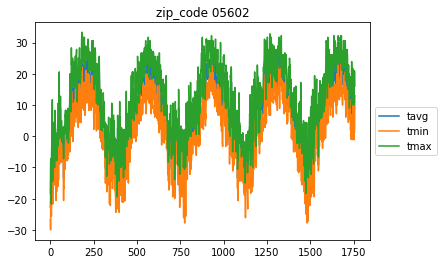

02067


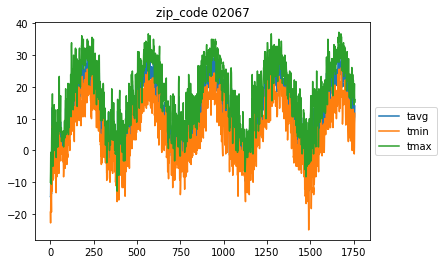

04530


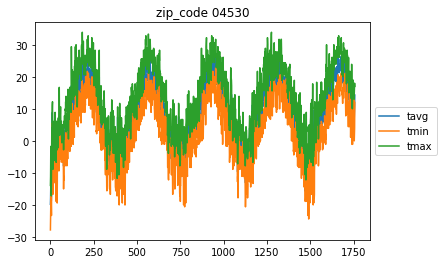

02199


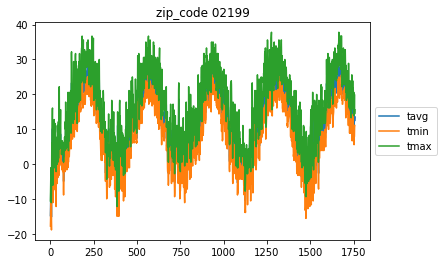

02126


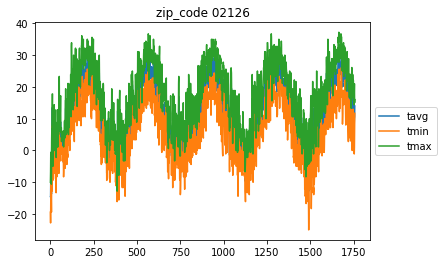

05446


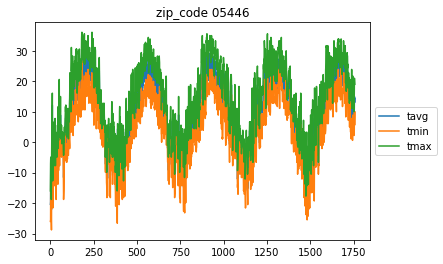

02747


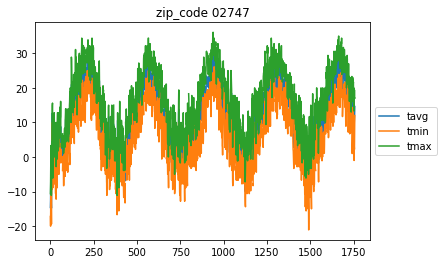

01757


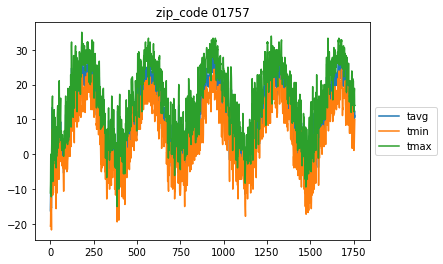

03087


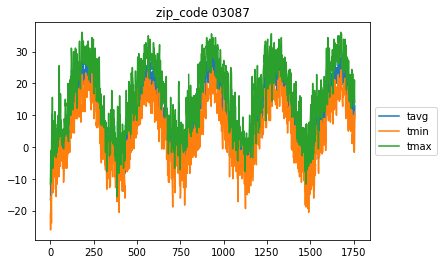

02341


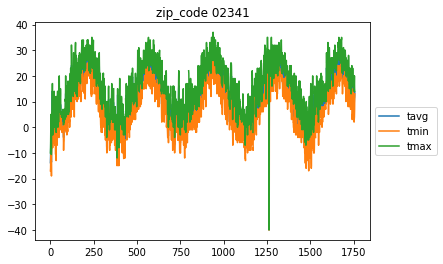

02720


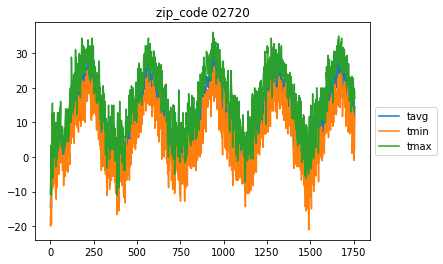

02052


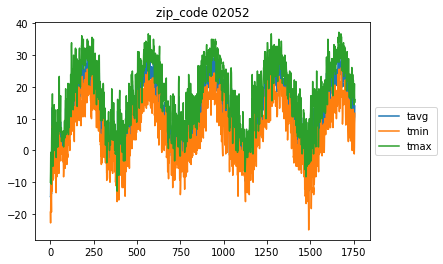

01721


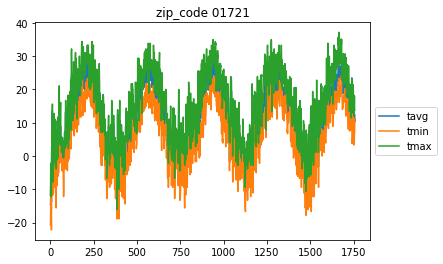

02453


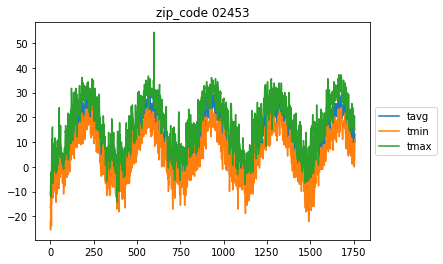

02025


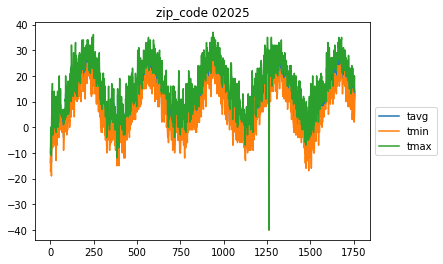

05495


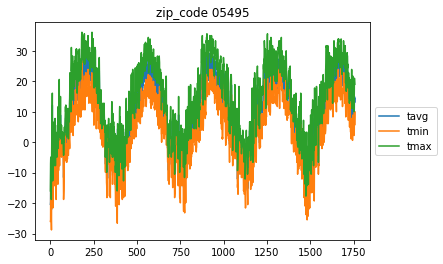

03785


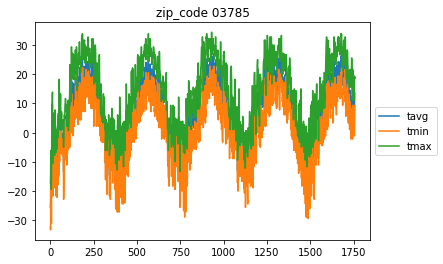

04210


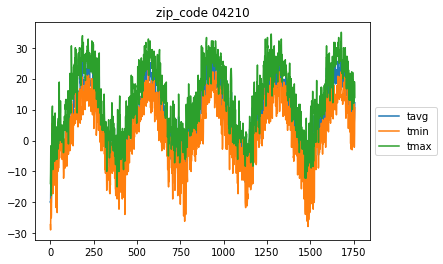

04330


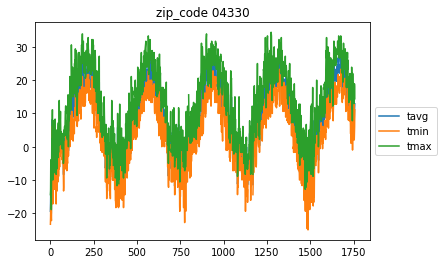

01776


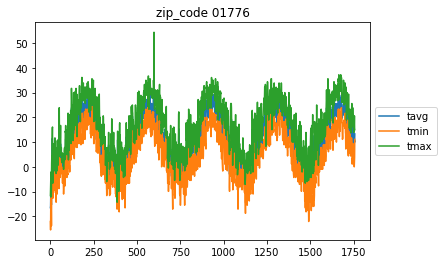

02169


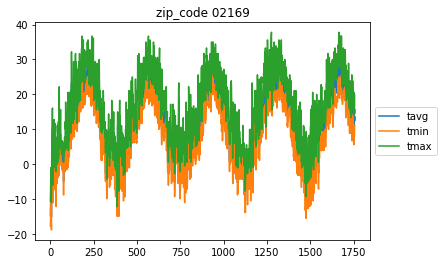

04072


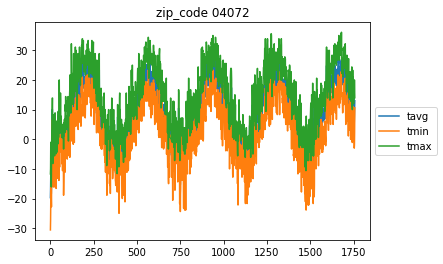

02189


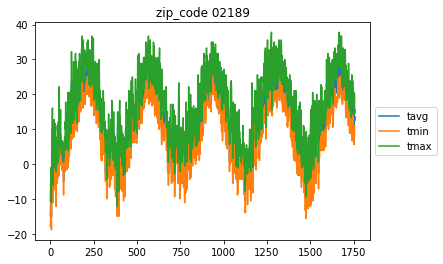

03038


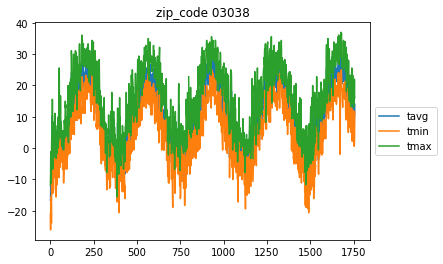

02460


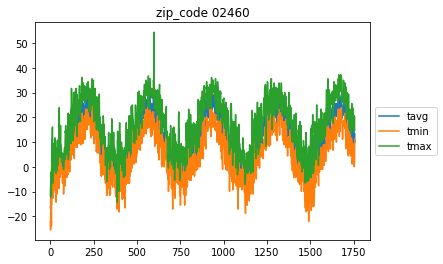

02038


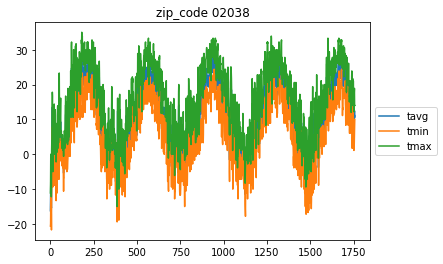

02215


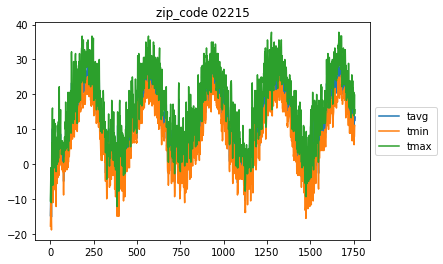

01915


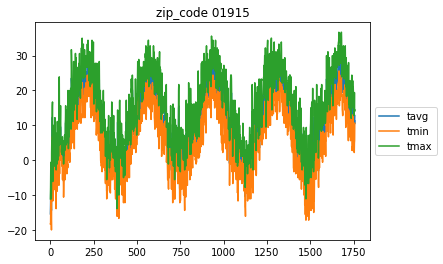

04105


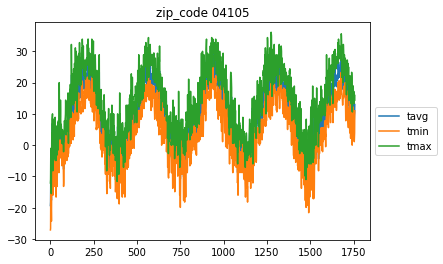

04605


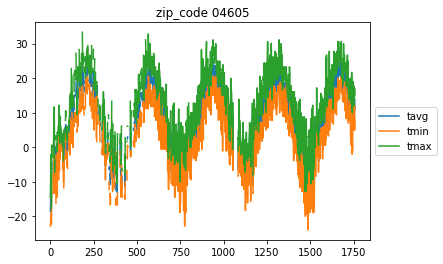

03060


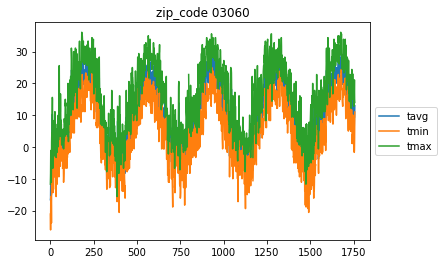

05403


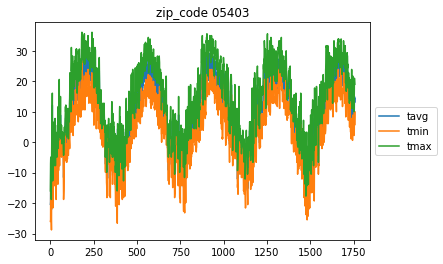

02140


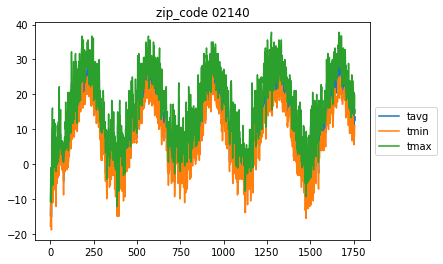

05363


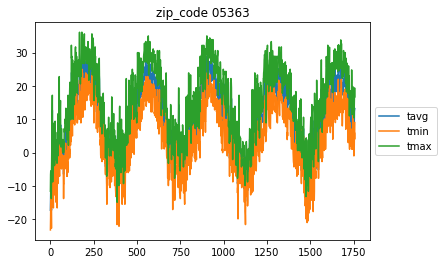

05673


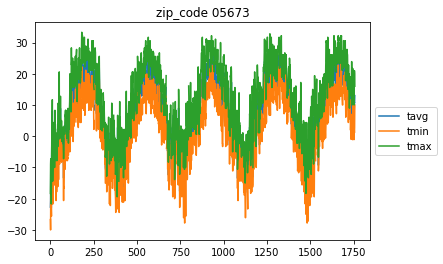

02026


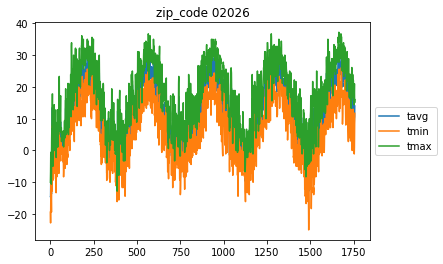

02021


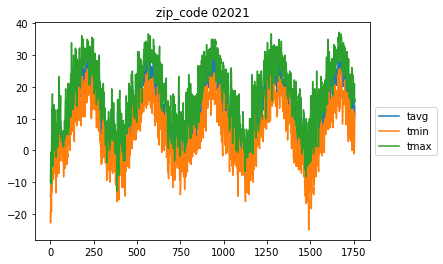

02048


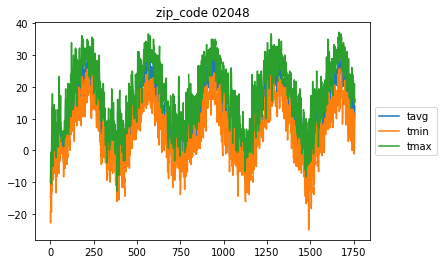

02339


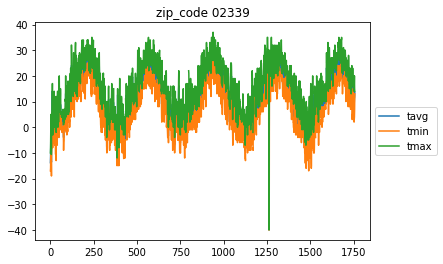

02886


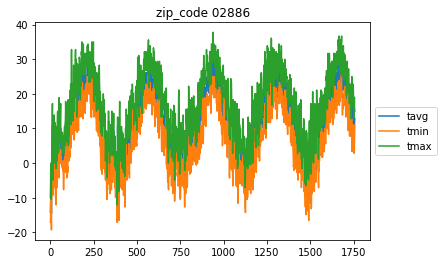

03053


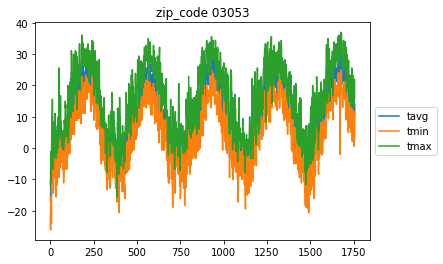

01803


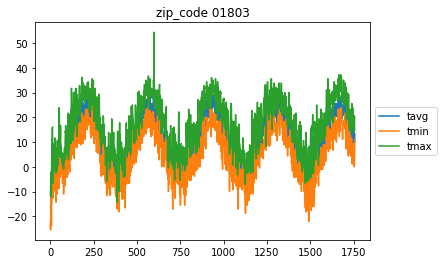

05060


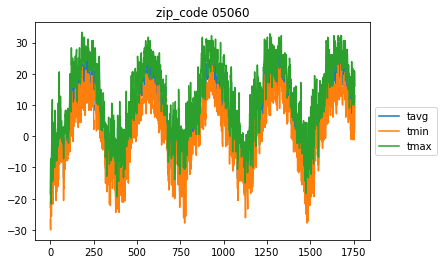

05255


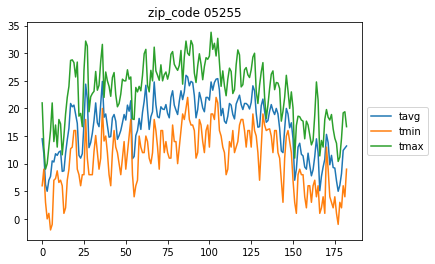

02536


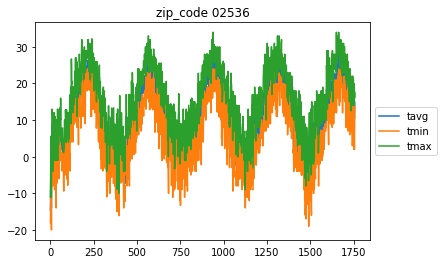

04032


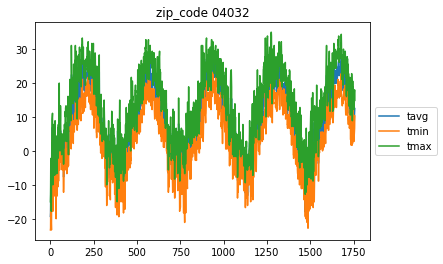

05829


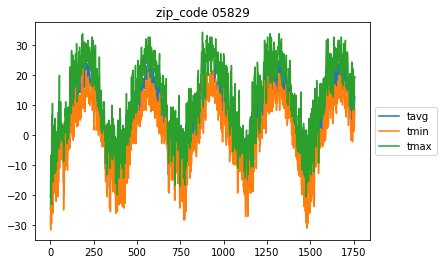

05602


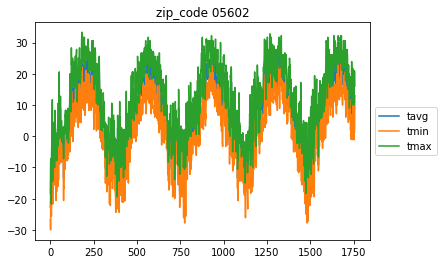

03885


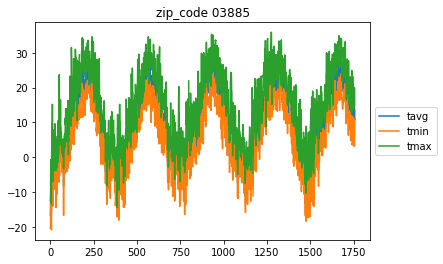

01603


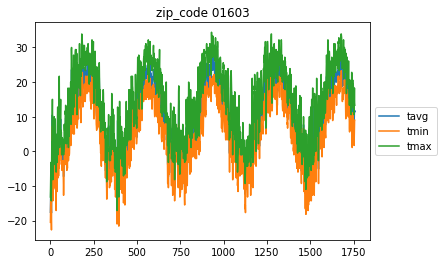

01605


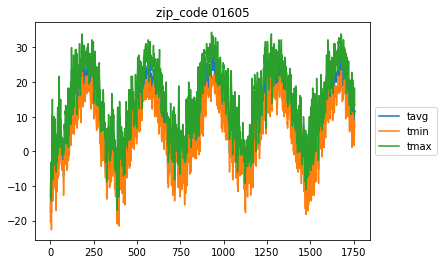

02920


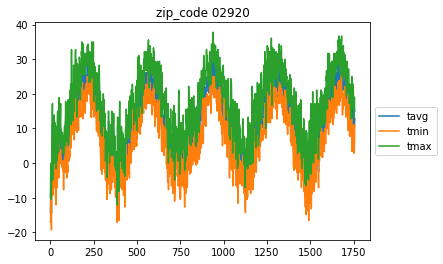

01450


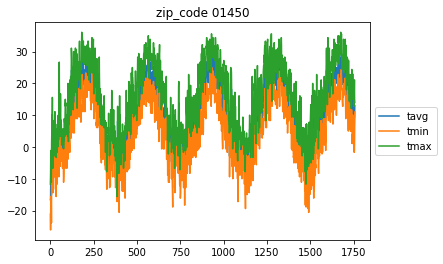

04011


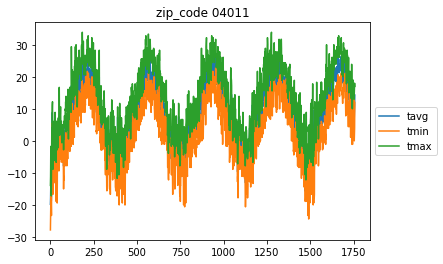

04426
02467


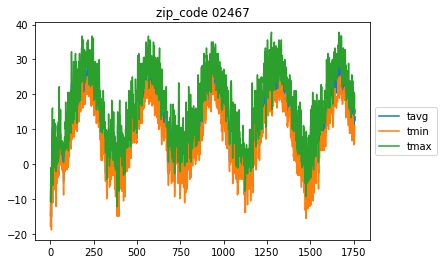

05676


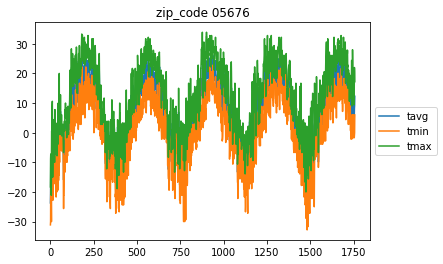

01510


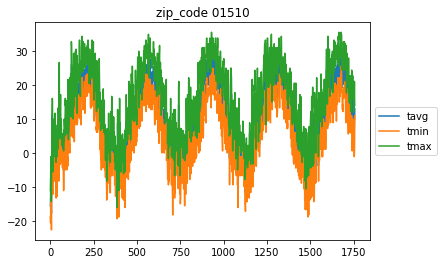

03054


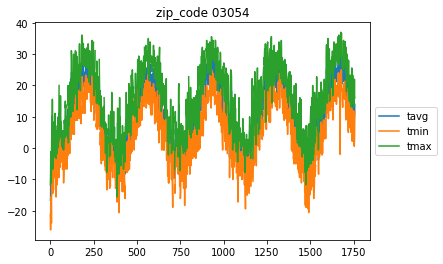

02653


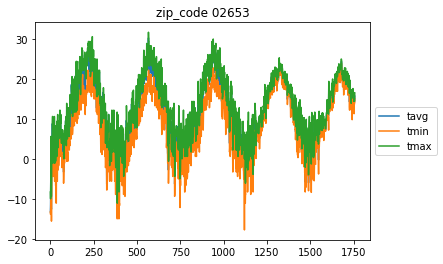

03301


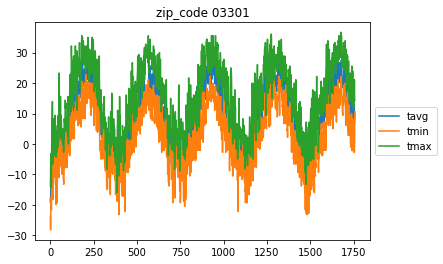

02128


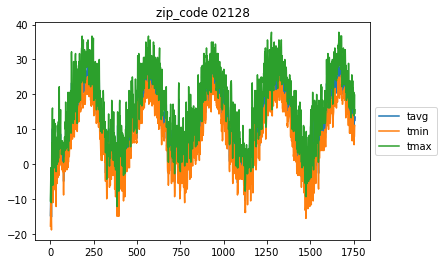

05753


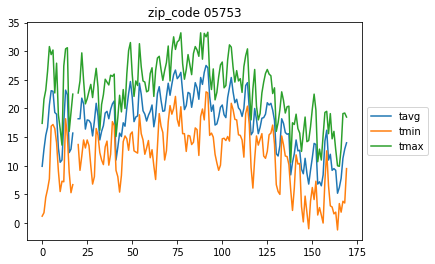

05764


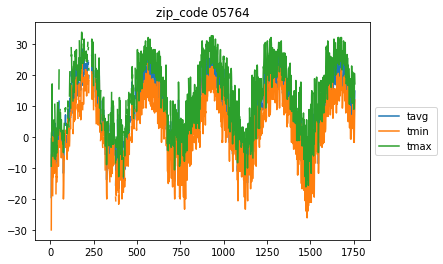

05743


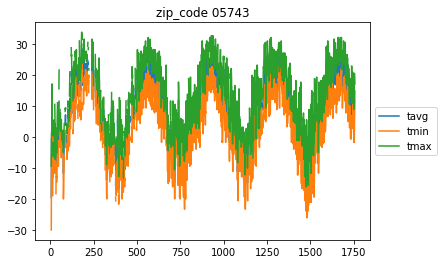

02349


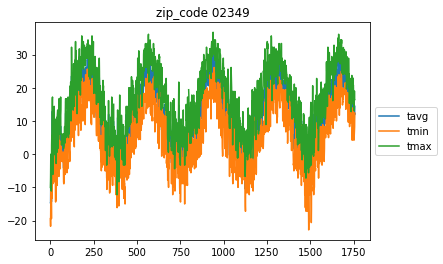

02184


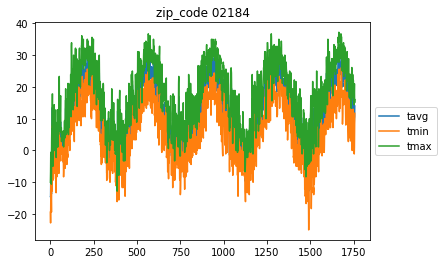

02760


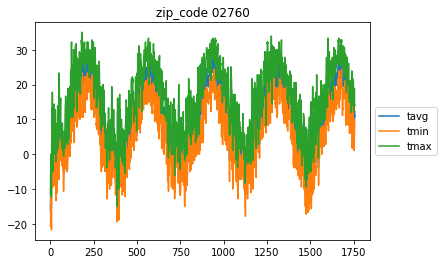

02368


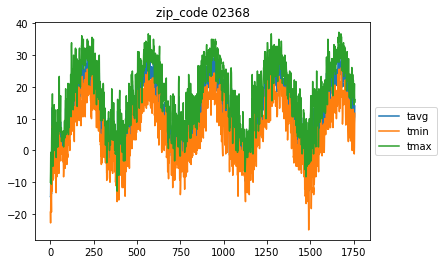

02767


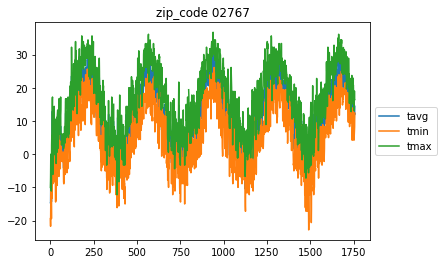

02301


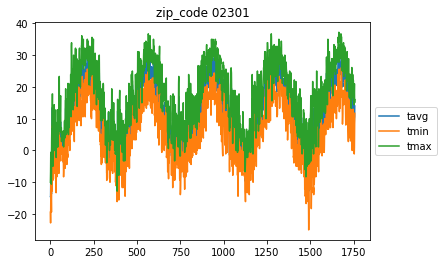

02053


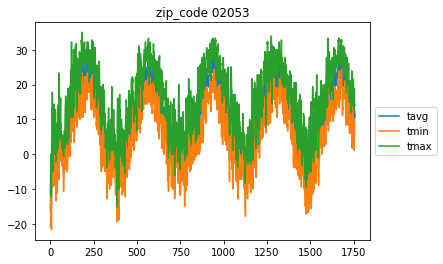

01588


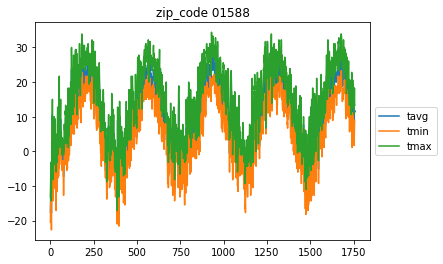

02806


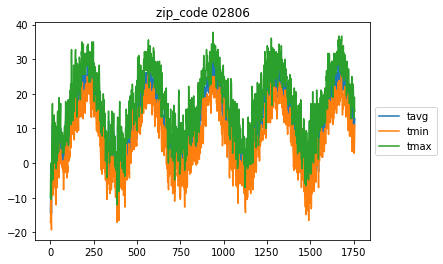

02842


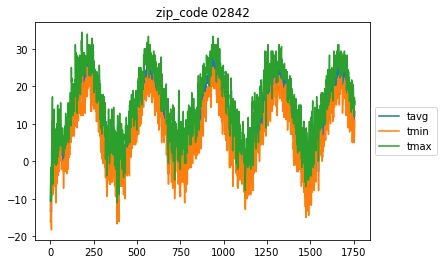

02601


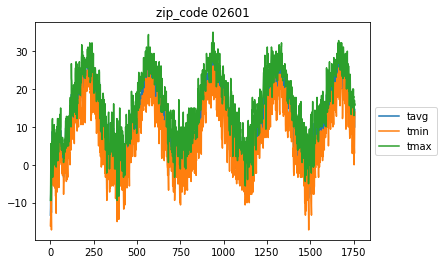

04578


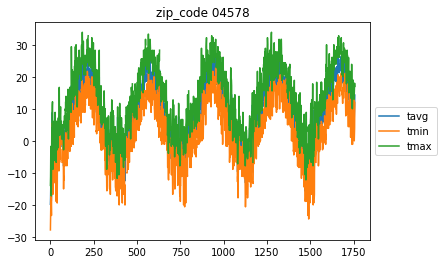

02330


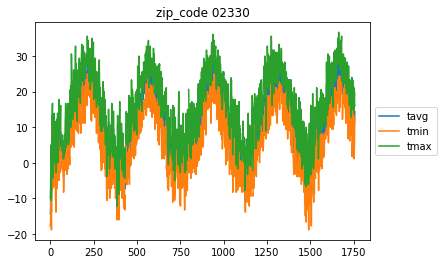

03220


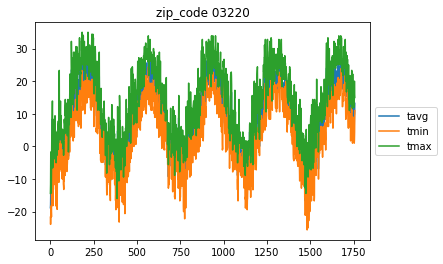

05672


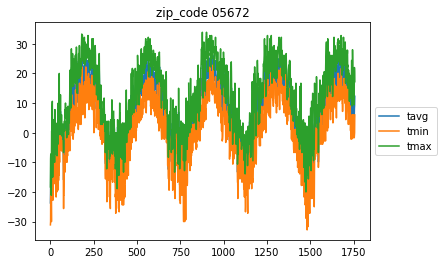

03818
02356


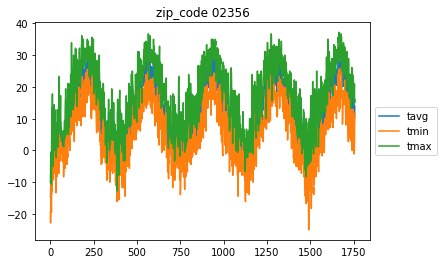

02879


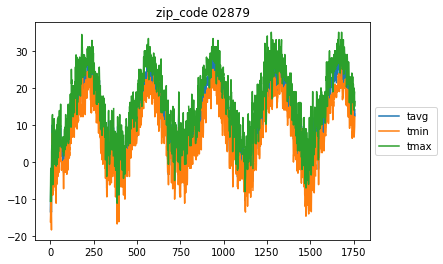

01545


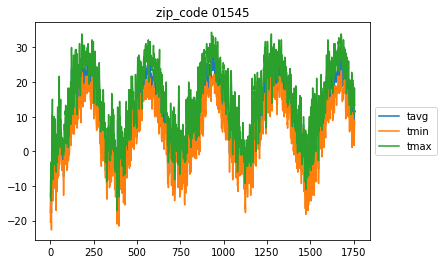

01566


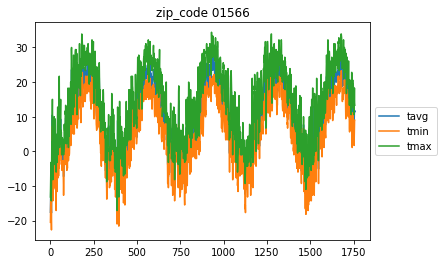

01960


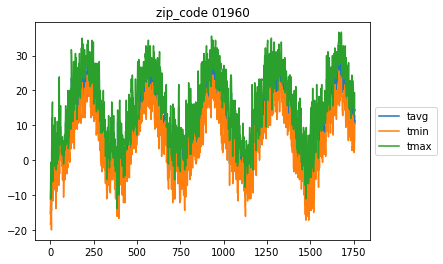

03820


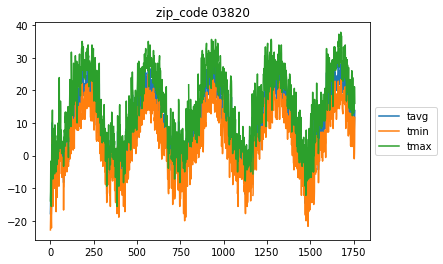

03301


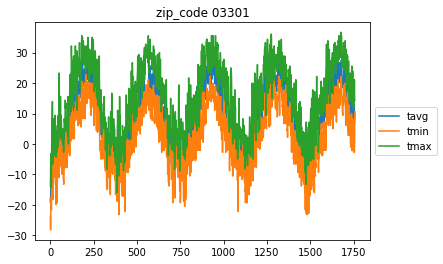

01950


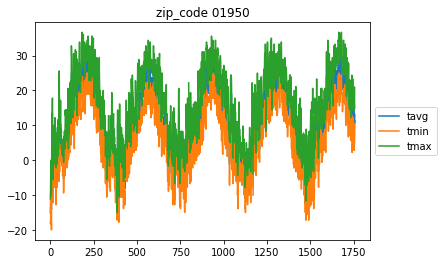

03055


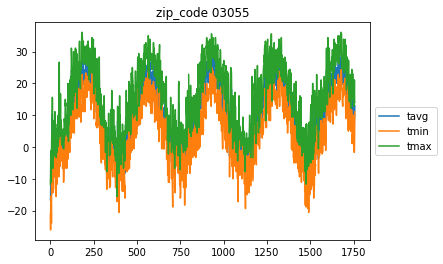

01970


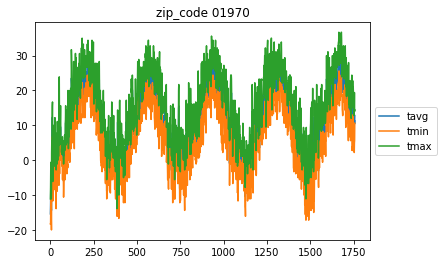

05149


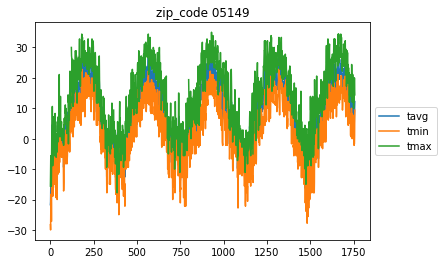

05156


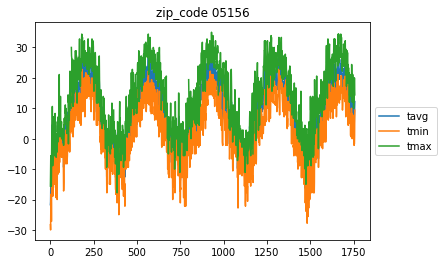

03584
05491


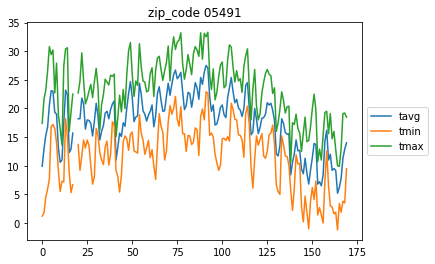

04062


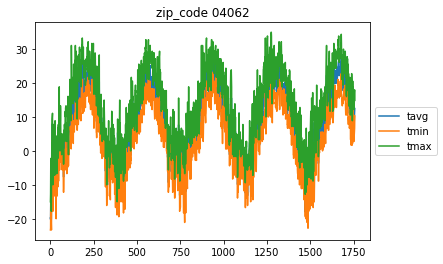

04103


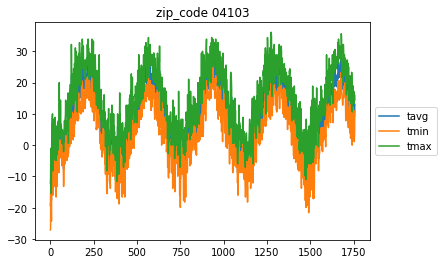

04074


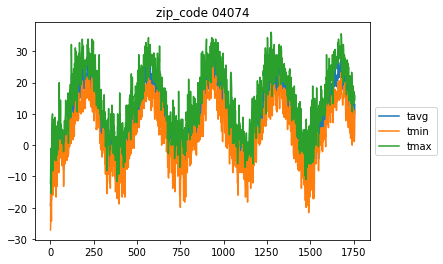

02138


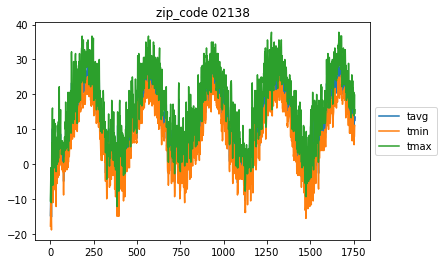

02452


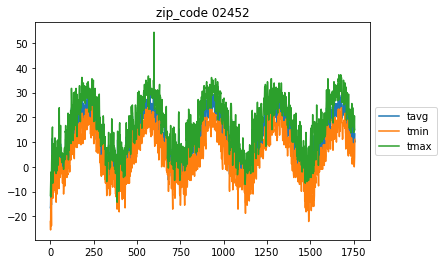

02145


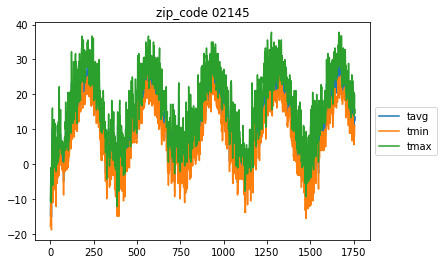

02215


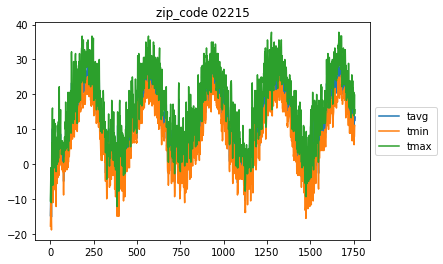

02136


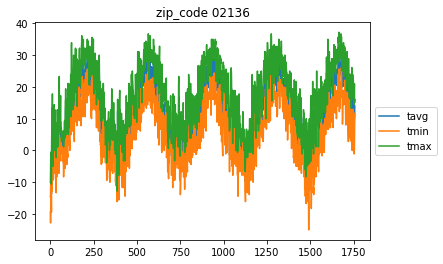

02478


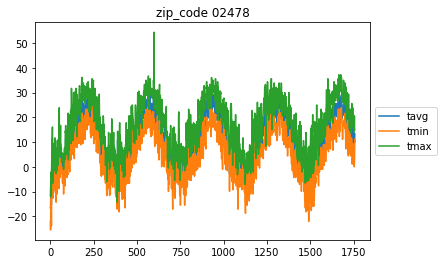

01775


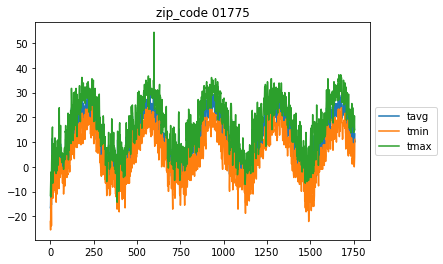

02360


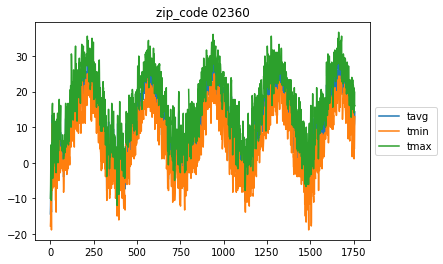

02050


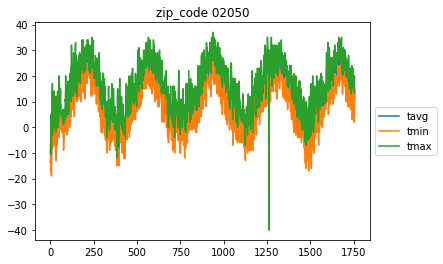

03561


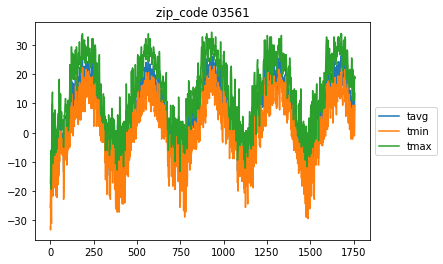

02571


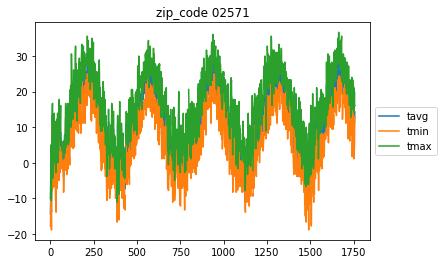

01749


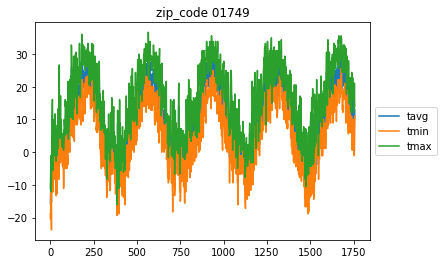

02915


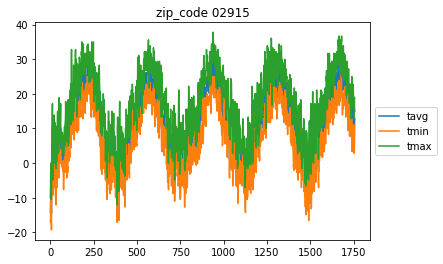

03054


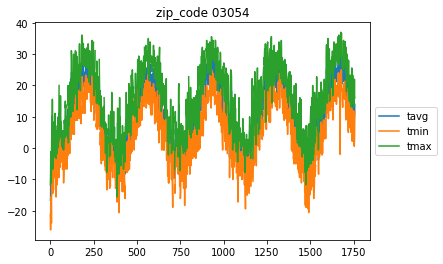

02176


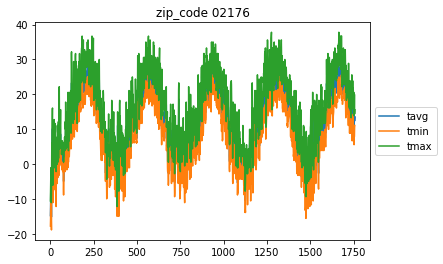

03060


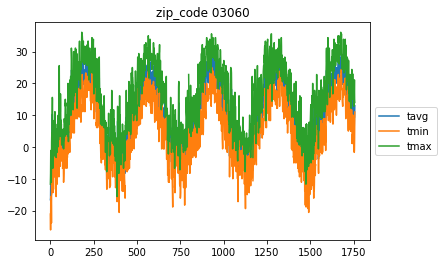

05443


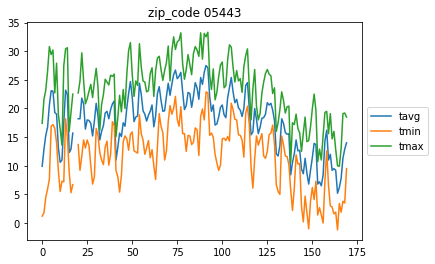

03608


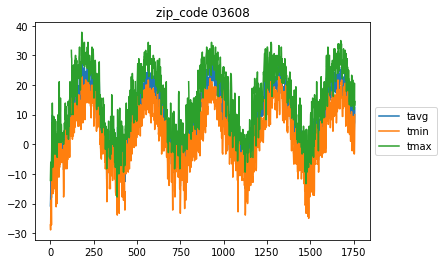

04106


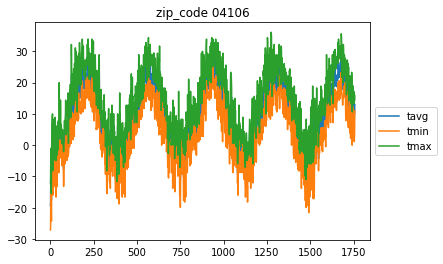

04841


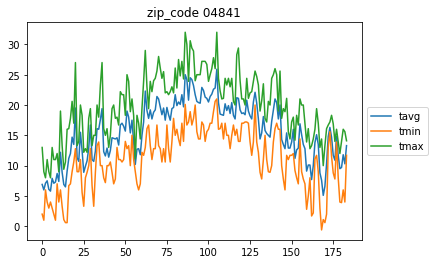

04901


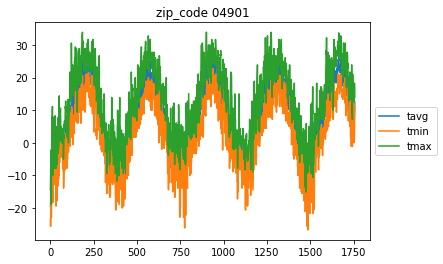

02445


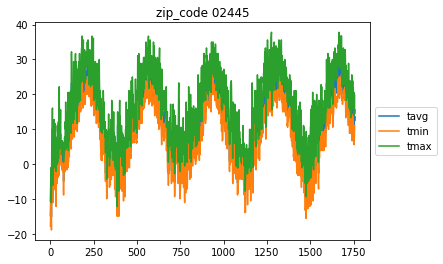

02062


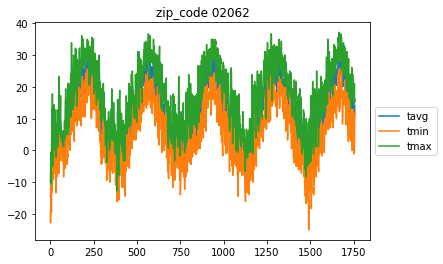

02132


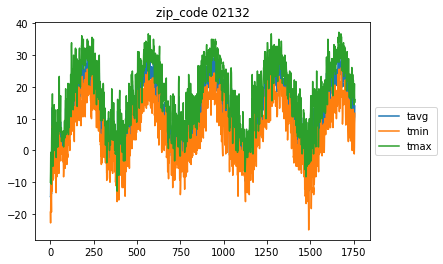

02143


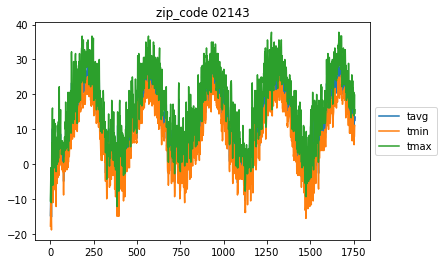

01930


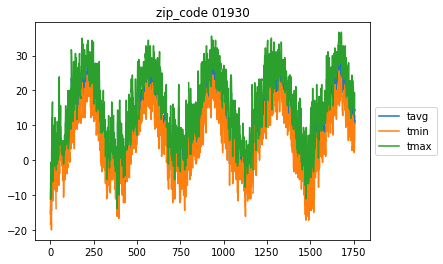

01930


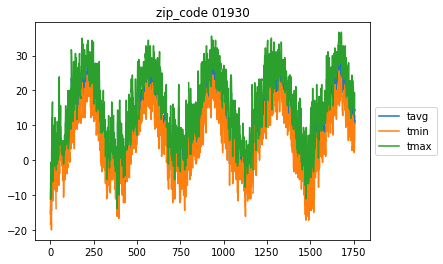

01880


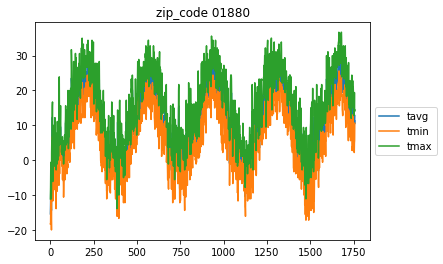

03865


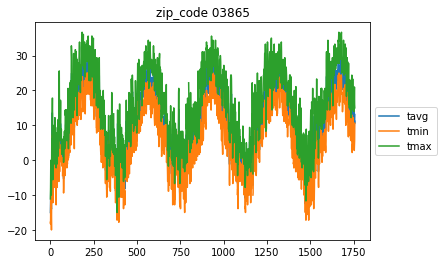

02914


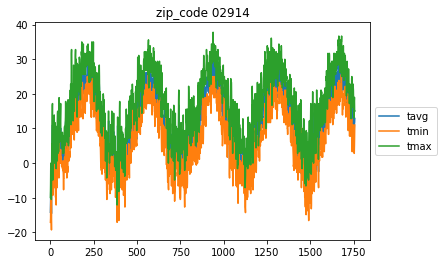

02664


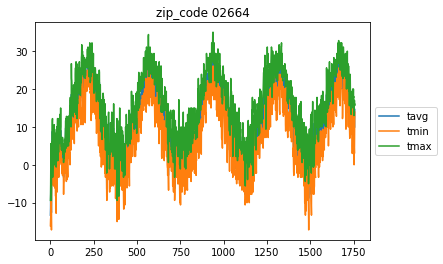

02114


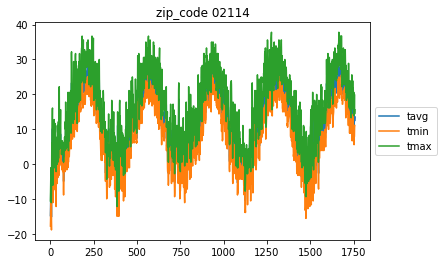

02302


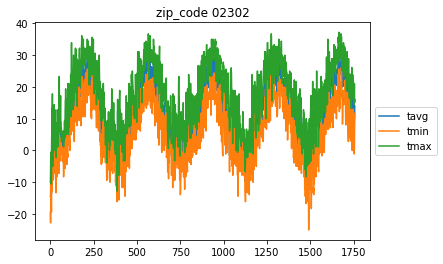

02904


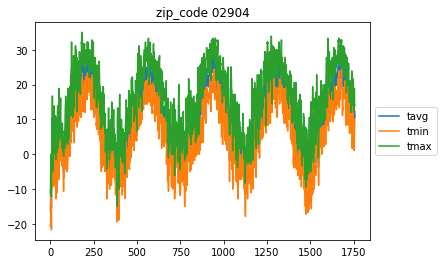

01501


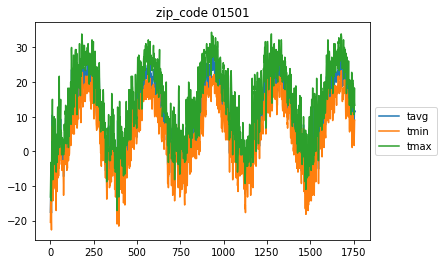

03106


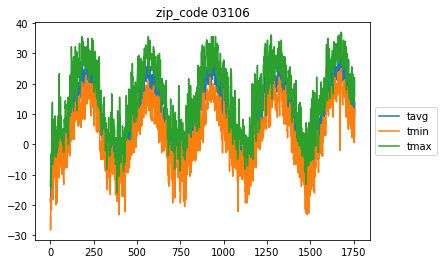

03862


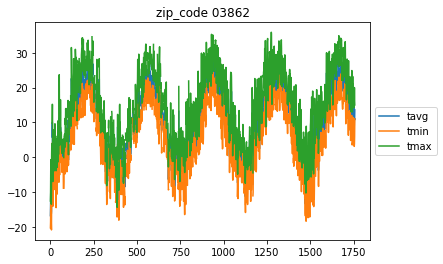

03244


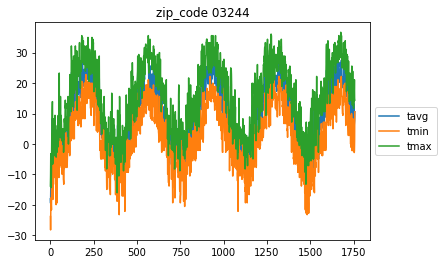

03773


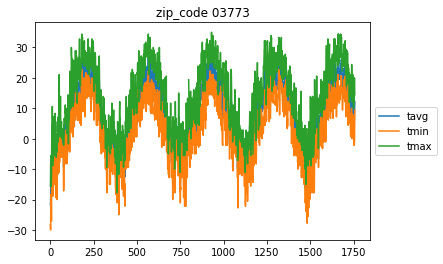

04102


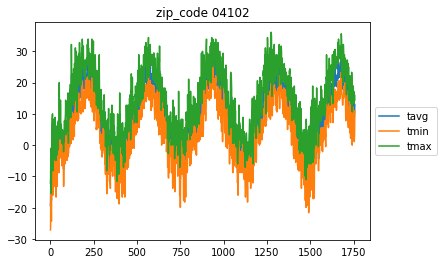

03784


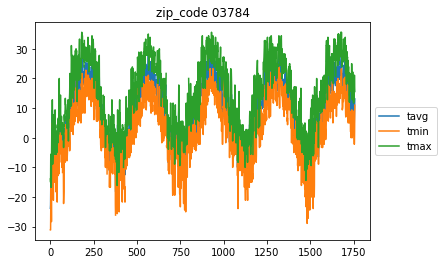

04401


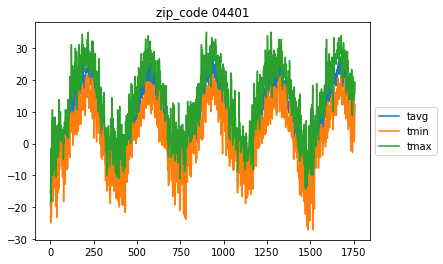

04240


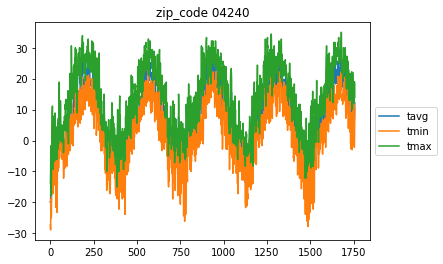

04073


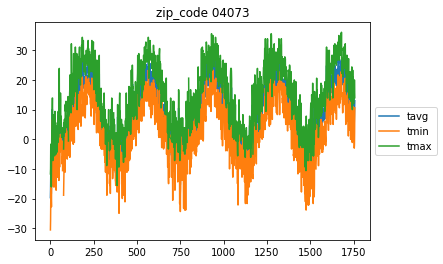

02466


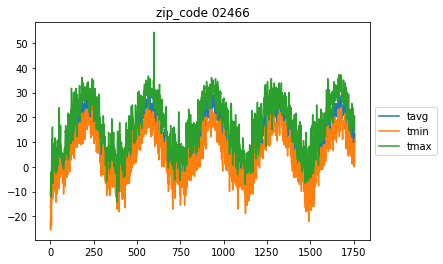

02135


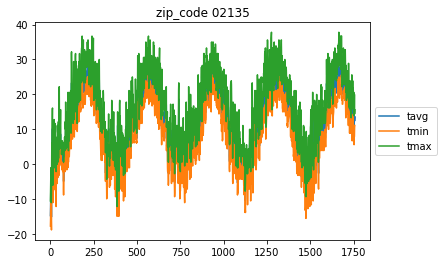

02125


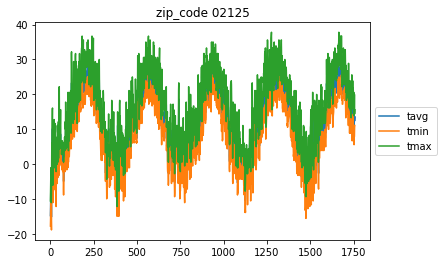

01938


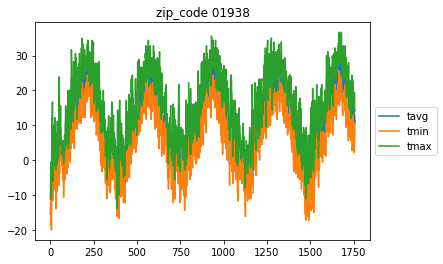

02601


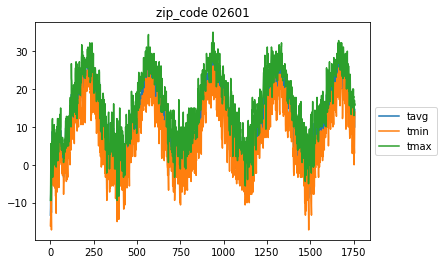

02646


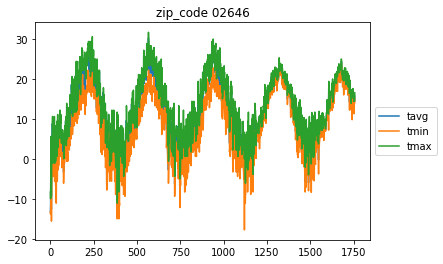

03458


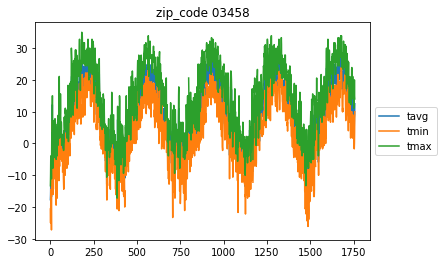

time  tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres  \
0     2018-01-01 -22.7 -26.7 -18.3   NaN   NaN    NaN  10.3   NaN  1026.9   
1     2018-01-02 -20.6 -30.0  -8.9   NaN   NaN    NaN   6.4   NaN     NaN   
2     2018-01-03 -10.5 -13.9  -7.2   NaN   NaN    NaN  10.2   NaN  1022.1   
3     2018-01-04 -11.9 -15.0  -8.9   NaN   NaN    NaN  12.8   NaN     NaN   
4     2018-01-05 -18.9 -21.7 -11.1   NaN   NaN  315.0  21.6   NaN     NaN   
...          ...   ...   ...   ...   ...   ...    ...   ...   ...     ...   
1753  2022-10-20   5.9  -1.0  12.2   0.0   NaN  209.0  12.8   NaN  1012.7   
1754  2022-10-21   5.6  -1.7  15.0   0.0   NaN  225.0   6.6   NaN  1019.8   
1755  2022-10-22   8.2   0.0  20.0   0.0   NaN  208.0   7.3   NaN  1024.8   
1756  2022-10-23   9.0   3.3  15.0   1.8   NaN   16.0   3.4   NaN  1027.8   
1757  2022-10-24  12.5  10.0  14.0   1.5   NaN   42.0   6.0   NaN  1024.7   

      tsun      lat    long    zip  
0      NaN  44.2641 -72.577  05602  
1      NaN  44.2641 -72.577  05602  
2      NaN  44.2641 -72.577  05602  
3      NaN  44.2641 -72.577  05602  
4      NaN  44.2641 -72.577  05602  
...    ...      ...     ...    ...  
1753   NaN  42.8856 -71.947  03458  
1754   NaN  42.8856 -71.947  03458  
1755   NaN  42.8856 -71.947  03458  
1756   NaN  42.8856 -71.947  03458  
1757   NaN  42.8856 -71.947  03458  

[248753 rows x 14 columns]

In [19]:
us_zip = pgeocode.Nominatim('us')
temp_df = pd.DataFrame()
addr_weather_df = pd.DataFrame()
lat_long_list = []
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2022, 10, 24)
err_list = []
for zip in df_zip['zipcode'].values.tolist():
    print(zip)
    lat, long = us_zip.query_postal_code(zip)[9:11][0], us_zip.query_postal_code(zip)[9:11][1]
    lat_long_list.append((lat, long))
    location = Point(lat, long)
    data = Daily(location, start, end)
    data = data.fetch()
    if len(data) == 0:
        err_list.append(zip)
        continue
    data.reset_index(inplace = True)
    data['lat'] = lat
    data['long'] = long
    data['zip'] = zip
    addr_weather_df = addr_weather_df.append(data)
    data.plot(y=['tavg', 'tmin', 'tmax'])
    plt.title('zip_code ' + zip)
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()
    
addr_weather_df['time'] = addr_weather_df['time'].apply(lambda x : x.strftime("%Y-%m-%d"))
addr_weather_df

In [20]:
err_list

['04426', '03818', '03584']

In [21]:
df_weather[df_weather.zip5 == '01450']

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0     01450  2019-03-20                  50.1                 23.6       1   
1     01450  2019-03-21                  51.0                 31.5      26   
2     01450  2019-03-22                  39.9                 32.4      18   
3     01450  2019-03-23                  52.1                 32.6      32   
4     01450  2019-03-24                  60.0                 26.5       3   
...     ...         ...                   ...                  ...     ...   
1317  01450  2022-10-27                  69.0                 54.0      32   
1318  01450  2022-10-28                  56.0                 34.0       7   
1319  01450  2022-10-29                  61.0                 34.0       8   
1320  01450  2022-10-30                  61.0                 39.0       9   
1321  01450  2022-10-31                  56.0                 39.0      17   

      precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
0                    0               6      30          LOW            14.9   
1                   66               6      30      MINIMAL            14.9   
2                    7               4      23      MINIMAL            35.8   
3                    0               6      13          LOW            50.7   
4                    0               7      30          LOW            23.9   
...                ...             ...     ...          ...             ...   
1317                52               8       0      MINIMAL            23.9   
1318                 0               6       0          LOW            22.4   
1319                 0               6       0          LOW            10.4   
1320                 0               6       0          LOW            11.9   
1321                 1               6       0      MINIMAL            14.9   

      humidity_pct  dew_point_amt  rain_fall_amt  snow_fall_amt  \
0               30           18.0            0.0            0.0   
1               41           26.0            0.5            0.0   
2               76           30.0            0.4            0.0   
3               35           22.0            0.0            0.0   
4               23           19.1            0.0            0.0   
...            ...            ...            ...            ...   
1317            66           42.0            0.1            0.0   
1318            65           33.0            0.0            0.0   
1319            69           39.0            0.0            0.0   
1320            74           41.0            0.0            0.0   
1321            83           45.0            0.1            0.0   

      comfort_index_amt  precipitation_probability_pct feed_cd  \
0                  43.9                              3     OTH   
1                  45.5                             93     OTH   
2                  28.7                             97     OTH   
3                  42.0                              0     OTH   
4                  54.1                              3     OTH   
...                 ...                            ...     ...   
1317               69.0                             56     OTH   
1318               39.5                              9     OTH   
1319               47.3                             13     OTH   
1320               46.1                             20     OTH   
1321               47.2                             36     OTH   

                     last_update_ts  
0     2019-03-20 07:31:11.000 -0600  
1     2019-03-21 07:31:31.000 -0600  
2     2019-03-22 07:32:52.000 -0600  
3     2019-03-23 07:31:35.000 -0600  
4     2019-03-24 07:31:16.000 -0600  
...                             ...  
1317  2022-10-25 07:31:18.000 -0600  
1318  2022-10-25 07:31:18.000 -0600  
1319  2022-10-25 07:31:18.000 -0600  
1320  2022-10-25 07:31:18.000 -0600  
1321  2022-10-25 07:31:18.000 -0600  

[1322 rows x 18 columns]

In [22]:
df_weather_consolidated = pd.merge(df_weather, addr_weather_df, how = 'inner', left_on = ['zip5', 'day_dt'], right_on = ['zip', 'time'])
df_weather_consolidated

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0       01450  2019-03-20                  50.1                 23.6       1   
1       01450  2019-03-21                  51.0                 31.5      26   
2       01450  2019-03-22                  39.9                 32.4      18   
3       01450  2019-03-23                  52.1                 32.6      32   
4       01450  2019-03-24                  60.0                 26.5       3   
...       ...         ...                   ...                  ...     ...   
184972  05829  2022-10-20                  48.4                 33.9      17   
184973  05829  2022-10-21                  51.9                 30.5       3   
184974  05829  2022-10-22                  60.9                 35.4       1   
184975  05829  2022-10-23                  64.1                 41.4       3   
184976  05829  2022-10-24                  57.4                 46.0      18   

        precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
0                      0               6      30          LOW            14.9   
1                     66               6      30      MINIMAL            14.9   
2                      7               4      23      MINIMAL            35.8   
3                      0               6      13          LOW            50.7   
4                      0               7      30          LOW            23.9   
...                  ...             ...     ...          ...             ...   
184972                 0               6       0      MINIMAL            23.9   
184973                 0               6       0      MINIMAL            17.9   
184974                 0               6      20      MINIMAL            17.9   
184975                65               8      30      MINIMAL             6.0   
184976                50               6       0      MINIMAL             6.0   

        ...  prcp  snow   wdir  wspd  wpgt    pres tsun      lat     long  \
0       ...   0.0   NaN    NaN   5.6   NaN  1027.8  NaN  42.6124 -71.5584   
1       ...   0.0   NaN    NaN  10.5   NaN  1020.6  NaN  42.6124 -71.5584   
2       ...  13.5   NaN  334.0  17.6   NaN   994.7  NaN  42.6124 -71.5584   
3       ...   0.5   NaN  282.0  26.6   NaN  1002.0  NaN  42.6124 -71.5584   
4       ...   0.0   NaN  278.0  11.5   NaN  1016.0  NaN  42.6124 -71.5584   
...     ...   ...   ...    ...   ...   ...     ...  ...      ...      ...   
184972  ...   0.0   NaN  187.0  14.7   NaN  1009.9  NaN  44.9502 -72.1376   
184973  ...   0.0   NaN  184.0  10.9   NaN  1017.5  NaN  44.9502 -72.1376   
184974  ...   0.0   NaN  169.0  12.9   NaN  1021.4  NaN  44.9502 -72.1376   
184975  ...   0.0   NaN  157.0   6.6   NaN  1026.4  NaN  44.9502 -72.1376   
184976  ...   0.2   NaN  137.0   4.5   NaN  1024.0  NaN  44.9502 -72.1376   

          zip  
0       01450  
1       01450  
2       01450  
3       01450  
4       01450  
...       ...  
184972  05829  
184973  05829  
184974  05829  
184975  05829  
184976  05829  

[184977 rows x 32 columns]

In [23]:
df_weather_consolidated['avg_temperature_amt'] = (df_weather_consolidated['high_temperature_amt'] + df_weather_consolidated['low_temperature_amt'] )/ 2

In [24]:
df_weather_consolidated['historic_tmin'] = df_weather_consolidated['tmin'].apply(lambda x : ((9 * x) / 5) + 32)
df_weather_consolidated['historic_tmax'] = df_weather_consolidated['tmax'].apply(lambda x : ((9 * x) / 5) + 32)
df_weather_consolidated['historic_tavg'] = df_weather_consolidated['tavg'].apply(lambda x : ((9 * x) / 5) + 32)

In [25]:
df_weather_consolidated.head()

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0  01450  2019-03-20                  50.1                 23.6       1   
1  01450  2019-03-21                  51.0                 31.5      26   
2  01450  2019-03-22                  39.9                 32.4      18   
3  01450  2019-03-23                  52.1                 32.6      32   
4  01450  2019-03-24                  60.0                 26.5       3   

   precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  ...  \
0                 0               6      30          LOW            14.9  ...   
1                66               6      30      MINIMAL            14.9  ...   
2                 7               4      23      MINIMAL            35.8  ...   
3                 0               6      13          LOW            50.7  ...   
4                 0               7      30          LOW            23.9  ...   

   wpgt    pres  tsun      lat     long    zip avg_temperature_amt  \
0   NaN  1027.8   NaN  42.6124 -71.5584  01450               36.85   
1   NaN  1020.6   NaN  42.6124 -71.5584  01450               41.25   
2   NaN   994.7   NaN  42.6124 -71.5584  01450               36.15   
3   NaN  1002.0   NaN  42.6124 -71.5584  01450               42.35   
4   NaN  1016.0   NaN  42.6124 -71.5584  01450               43.25   

  historic_tmin historic_tmax  historic_tavg  
0         17.96         51.98          36.14  
1         28.04         50.00          40.28  
2         35.96         41.00          38.48  
3         33.08         44.06          37.40  
4         28.04         57.20          43.52  

[5 rows x 36 columns]

In [26]:
df_weather_consolidated.columns

Index(['zip5', 'day_dt', 'high_temperature_amt', 'low_temperature_amt',
       'sky_cd', 'precipitation_cd', 'temperature_cd', 'air_cd',
       'uv_index_dsc', 'wind_speed_amt', 'humidity_pct', 'dew_point_amt',
       'rain_fall_amt', 'snow_fall_amt', 'comfort_index_amt',
       'precipitation_probability_pct', 'feed_cd', 'last_update_ts', 'time',
       'tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
       'tsun', 'lat', 'long', 'zip', 'avg_temperature_amt', 'historic_tmin',
       'historic_tmax', 'historic_tavg'],
      dtype='object')

In [27]:
df_weather_consolidated.iloc[0]

zip5                                                     01450
day_dt                                              2019-03-20
high_temperature_amt                                      50.1
low_temperature_amt                                       23.6
sky_cd                                                       1
precipitation_cd                                             0
temperature_cd                                               6
air_cd                                                      30
uv_index_dsc                                               LOW
wind_speed_amt                                            14.9
humidity_pct                                                30
dew_point_amt                                             18.0
rain_fall_amt                                              0.0
snow_fall_amt                                              0.0
comfort_index_amt                                         43.9
precipitation_probability_pct                          

In [28]:
#df_txn_1 = pd.read_csv('result_txn_1.csv')
#df_txn_2 = pd.read_csv('result_txn_2.csv')
#df_txn_1.columns = [col.lower() for col in df_txn_1.columns]
#df_txn_2.columns = [col.lower() for col in df_txn_2.columns]
df_txn = pd.read_csv('result_txn.csv')
df_txn.columns = [col.lower() for col in df_txn.columns]
df_txn.head()

txn_dte  consumer_selling_cd  smic_group_cd  store_id  total_gross_amt  \
0  2021-05-17               146629             25       625            13.41   
1  2022-06-07               322059             11       625           378.81   
2  2021-12-16               146385             25       625            11.94   
3  2022-10-13               322058             11       625             9.98   
4  2020-03-28               322064             11       625            11.97   

   total_item_qty  total_mkdn_qty  total_mkdn_amt  total_net_amt  \
0               9               0             0.0          13.41   
1              69             147          -277.8         101.01   
2               6               0             0.0          11.94   
3               2               0             0.0           9.98   
4               3               0             0.0          11.97   

   total_mkdn_wod_alloc_amt  total_mkdn_pod_alloc_amt  reg_unit_prc  \
0                       0.0                       0.0          1.49   
1                       0.0                       0.0          5.49   
2                       0.0                       0.0          1.99   
3                       0.0                       0.0          4.99   
4                       0.0                       0.0          3.99   

   promo_unit_prc  
0             NaN  
1            2.99  
2             NaN  
3             NaN  
4             NaN

In [29]:
len(df_txn[['consumer_selling_cd']].drop_duplicates())

20

In [30]:
df_weather_consolidated['day_dt'].min(), df_txn['txn_dte'].min()

('2019-03-20', '2020-01-01')

In [31]:
df_txn.groupby(['store_id','consumer_selling_cd']).agg({'txn_dte': np.min})

txn_dte
store_id consumer_selling_cd            
625      146385               2020-01-01
         146393               2020-01-01
         146399               2020-01-01
         146404               2020-01-01
         146408               2020-01-01
         146469               2020-01-03
         146629               2020-01-01
         146835               2020-01-01
         322058               2020-01-01
         322059               2020-01-01
         322060               2020-01-01
         322064               2020-01-01
         322082               2020-01-01
         322087               2020-01-01
         322554               2020-01-01
         322557               2020-01-01
         322617               2020-01-01
         413364               2020-01-01
         460913               2020-01-01
         464561               2020-01-01

In [32]:
top_csc_list = [464561
,460913
,413364
,322617
,322557
,322554
,322087
,322082
,322064
,322060
,322059
,322058
,146835
,146629
,146469
,146408
,146404
,146399
,146393
,146385
]

In [33]:
df_txn_case_1 = df_txn[(df_txn.store_id == 625) & (df_txn.consumer_selling_cd.isin(top_csc_list)) & (df_txn.txn_dte >= '2020-10-25')].sort_values(by=['txn_dte'])
df_txn_case_1.sort_values(by=['txn_dte'], inplace = True)
df_txn_case_1

txn_dte  consumer_selling_cd  smic_group_cd  store_id  \
1803  2020-10-25               413364             25       625   
6777  2020-10-25               146404             25       625   
663   2020-10-25               146469             25       625   
6774  2020-10-25               146385             25       625   
6775  2020-10-25               146399             25       625   
...          ...                  ...            ...       ...   
469   2022-10-19               322060             11       625   
2215  2022-10-19               322064             11       625   
2214  2022-10-19               322059             11       625   
2224  2022-10-20               322064             11       625   
2223  2022-10-20               322059             11       625   

      total_gross_amt  total_item_qty  total_mkdn_qty  total_mkdn_amt  \
1803            14.95               5               0            0.00   
6777            14.95               5               0            0.00   
663             23.92               8               0            0.00   
6774            35.82              18               0            0.00   
6775            63.68              32              40          -13.03   
...               ...             ...             ...             ...   
469              6.49               1               0            0.00   
2215            98.82              18              37          -62.44   
2214           269.01              49             104         -178.42   
2224             5.49               1               2           -3.52   
2223             5.49               1               2           -3.52   

      total_net_amt  total_mkdn_wod_alloc_amt  total_mkdn_pod_alloc_amt  \
1803          14.95                       0.0                       0.0   
6777          14.95                       0.0                       0.0   
663           23.92                       0.0                       0.0   
6774          35.82                       0.0                       0.0   
6775          50.65                       0.0                       0.0   
...             ...                       ...                       ...   
469            6.49                       0.0                       0.0   
2215          36.38                       0.0                       0.0   
2214          90.59                       0.0                       0.0   
2224           1.97                       0.0                       0.0   
2223           1.97                       0.0                       0.0   

      reg_unit_prc  promo_unit_prc  
1803          2.99             NaN  
6777          2.69             NaN  
663           2.69             NaN  
6774          1.99             NaN  
6775          1.99        1.666667  
...            ...             ...  
469           6.49             NaN  
2215          3.99             NaN  
2214          5.49        2.990000  
2224          3.99             NaN  
2223          5.49        2.990000  

[12267 rows x 13 columns]

In [34]:
df_txn_case_1['consumer_selling_cd'].drop_duplicates()

1803    413364
6777    146404
663     146469
6774    146385
6775    146399
6776    146393
6778    146408
6779    146629
6781    322058
6780    146835
6783    322060
6782    322064
6789    460913
6788    322617
6787    322557
6790    464561
6785    322082
6784    322087
6786    322554
6799    322059
Name: consumer_selling_cd, dtype: int64

In [35]:
df_weather_2920 = df_weather_consolidated[df_weather_consolidated.zip == '02920']
df_weather_2920 = pd.merge(df_weather_2920, df_holiday_combined[df_holiday_combined.level == 'FE'][['date']].drop_duplicates(), how = 'left', left_on = 'day_dt', right_on = 'date')
df_weather_2920['date'] = np.where(df_weather_2920['date'].isna(), 0, 1)
df_weather_2920

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0     02920  2019-03-20                  53.8                 28.3       3   
1     02920  2019-03-21                  53.9                 37.3      12   
2     02920  2019-03-22                  45.9                 38.4      18   
3     02920  2019-03-23                  49.8                 33.3      32   
4     02920  2019-03-24                  59.9                 30.3      14   
...     ...         ...                   ...                  ...     ...   
1310  02920  2022-10-20                  60.8                 40.3       3   
1311  02920  2022-10-21                  64.8                 45.3       3   
1312  02920  2022-10-22                  68.8                 47.3       3   
1313  02920  2022-10-23                  60.9                 45.4      26   
1314  02920  2022-10-24                  62.9                 48.4      19   

      precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
0                    0               6      30          LOW            17.9   
1                   67               6      30      MINIMAL            29.8   
2                    7               6       0      MINIMAL            35.8   
3                    0               6      30          LOW            44.7   
4                    0               7      30          LOW            29.8   
...                ...             ...     ...          ...             ...   
1310                 0               6      21          LOW            29.8   
1311                 0               8      30      MINIMAL            17.9   
1312                 0               8      29      MINIMAL            14.9   
1313                 7               6       0      MINIMAL            32.8   
1314                18               8      32      MINIMAL            11.9   

      ...    pres  tsun      lat     long    zip  avg_temperature_amt  \
0     ...  1028.7   NaN  41.7716 -71.4659  02920                41.05   
1     ...  1020.6   NaN  41.7716 -71.4659  02920                45.60   
2     ...   987.5   NaN  41.7716 -71.4659  02920                42.15   
3     ...   996.9   NaN  41.7716 -71.4659  02920                41.55   
4     ...  1017.0   NaN  41.7716 -71.4659  02920                45.10   
...   ...     ...   ...      ...      ...    ...                  ...   
1310  ...  1015.1   NaN  41.7716 -71.4659  02920                50.55   
1311  ...  1020.2   NaN  41.7716 -71.4659  02920                55.05   
1312  ...  1025.2   NaN  41.7716 -71.4659  02920                58.05   
1313  ...  1026.4   NaN  41.7716 -71.4659  02920                53.15   
1314  ...  1023.4   NaN  41.7716 -71.4659  02920                55.65   

     historic_tmin historic_tmax historic_tavg  date  
0            25.16         48.92         37.58     0  
1            29.12         48.92         40.46     0  
2            35.06         44.96         40.82     0  
3            31.10         46.04         37.76     0  
4            31.10         57.02         41.36     0  
...            ...           ...           ...   ...  
1310         39.02         57.02         47.48     0  
1311         37.04         64.40         50.18     0  
1312         41.00         66.20         52.52     0  
1313         48.02         59.00         53.06     0  
1314         51.80         59.00         55.22     0  

[1315 rows x 37 columns]

In [36]:
df_holiday_combined

level  year        date                          holiday_name
0     FE  2022  2022-01-01                        New Year's Day
1     FE  2022  2022-01-17            Martin Luther King Jr. Day
2     FE  2022  2022-02-21                 Washington's Birthday
3     FE  2022  2022-05-30                          Memorial Day
4     FE  2022  2022-06-19  Juneteenth National Independence Day
..   ...   ...         ...                                   ...
44    VA  2020  2020-01-17                       Lee Jackson Day
45    VT  2020  2020-03-03                      Town Meeting Day
46    VT  2020  2020-08-16                 Bennington Battle Day
47    VT  2020  2020-08-17      Bennington Battle Day (Observed)
48    WV  2020  2020-06-20                     West Virginia Day

[152 rows x 4 columns]

In [37]:
df_weather_2920[~df_weather_2920.date.isna()]

zip5      day_dt  high_temperature_amt  low_temperature_amt  sky_cd  \
0     02920  2019-03-20                  53.8                 28.3       3   
1     02920  2019-03-21                  53.9                 37.3      12   
2     02920  2019-03-22                  45.9                 38.4      18   
3     02920  2019-03-23                  49.8                 33.3      32   
4     02920  2019-03-24                  59.9                 30.3      14   
...     ...         ...                   ...                  ...     ...   
1310  02920  2022-10-20                  60.8                 40.3       3   
1311  02920  2022-10-21                  64.8                 45.3       3   
1312  02920  2022-10-22                  68.8                 47.3       3   
1313  02920  2022-10-23                  60.9                 45.4      26   
1314  02920  2022-10-24                  62.9                 48.4      19   

      precipitation_cd  temperature_cd  air_cd uv_index_dsc  wind_speed_amt  \
0                    0               6      30          LOW            17.9   
1                   67               6      30      MINIMAL            29.8   
2                    7               6       0      MINIMAL            35.8   
3                    0               6      30          LOW            44.7   
4                    0               7      30          LOW            29.8   
...                ...             ...     ...          ...             ...   
1310                 0               6      21          LOW            29.8   
1311                 0               8      30      MINIMAL            17.9   
1312                 0               8      29      MINIMAL            14.9   
1313                 7               6       0      MINIMAL            32.8   
1314                18               8      32      MINIMAL            11.9   

      ...    pres  tsun      lat     long    zip  avg_temperature_amt  \
0     ...  1028.7   NaN  41.7716 -71.4659  02920                41.05   
1     ...  1020.6   NaN  41.7716 -71.4659  02920                45.60   
2     ...   987.5   NaN  41.7716 -71.4659  02920                42.15   
3     ...   996.9   NaN  41.7716 -71.4659  02920                41.55   
4     ...  1017.0   NaN  41.7716 -71.4659  02920                45.10   
...   ...     ...   ...      ...      ...    ...                  ...   
1310  ...  1015.1   NaN  41.7716 -71.4659  02920                50.55   
1311  ...  1020.2   NaN  41.7716 -71.4659  02920                55.05   
1312  ...  1025.2   NaN  41.7716 -71.4659  02920                58.05   
1313  ...  1026.4   NaN  41.7716 -71.4659  02920                53.15   
1314  ...  1023.4   NaN  41.7716 -71.4659  02920                55.65   

     historic_tmin historic_tmax historic_tavg  date  
0            25.16         48.92         37.58     0  
1            29.12         48.92         40.46     0  
2            35.06         44.96         40.82     0  
3            31.10         46.04         37.76     0  
4            31.10         57.02         41.36     0  
...            ...           ...           ...   ...  
1310         39.02         57.02         47.48     0  
1311         37.04         64.40         50.18     0  
1312         41.00         66.20         52.52     0  
1313         48.02         59.00         53.06     0  
1314         51.80         59.00         55.22     0  

[1315 rows x 37 columns]

In [38]:
df_txn_case_1

txn_dte  consumer_selling_cd  smic_group_cd  store_id  \
1803  2020-10-25               413364             25       625   
6777  2020-10-25               146404             25       625   
663   2020-10-25               146469             25       625   
6774  2020-10-25               146385             25       625   
6775  2020-10-25               146399             25       625   
...          ...                  ...            ...       ...   
469   2022-10-19               322060             11       625   
2215  2022-10-19               322064             11       625   
2214  2022-10-19               322059             11       625   
2224  2022-10-20               322064             11       625   
2223  2022-10-20               322059             11       625   

      total_gross_amt  total_item_qty  total_mkdn_qty  total_mkdn_amt  \
1803            14.95               5               0            0.00   
6777            14.95               5               0            0.00   
663             23.92               8               0            0.00   
6774            35.82              18               0            0.00   
6775            63.68              32              40          -13.03   
...               ...             ...             ...             ...   
469              6.49               1               0            0.00   
2215            98.82              18              37          -62.44   
2214           269.01              49             104         -178.42   
2224             5.49               1               2           -3.52   
2223             5.49               1               2           -3.52   

      total_net_amt  total_mkdn_wod_alloc_amt  total_mkdn_pod_alloc_amt  \
1803          14.95                       0.0                       0.0   
6777          14.95                       0.0                       0.0   
663           23.92                       0.0                       0.0   
6774          35.82                       0.0                       0.0   
6775          50.65                       0.0                       0.0   
...             ...                       ...                       ...   
469            6.49                       0.0                       0.0   
2215          36.38                       0.0                       0.0   
2214          90.59                       0.0                       0.0   
2224           1.97                       0.0                       0.0   
2223           1.97                       0.0                       0.0   

      reg_unit_prc  promo_unit_prc  
1803          2.99             NaN  
6777          2.69             NaN  
663           2.69             NaN  
6774          1.99             NaN  
6775          1.99        1.666667  
...            ...             ...  
469           6.49             NaN  
2215          3.99             NaN  
2214          5.49        2.990000  
2224          3.99             NaN  
2223          5.49        2.990000  

[12267 rows x 13 columns]

In [40]:
df_txn_consolidated_case_1 = pd.merge(df_txn_case_1, df_weather_2920, how = 'inner', right_on = ['day_dt'], left_on = ['txn_dte'])
df_txn_consolidated_case_1['promo_unit_prc'] = df_txn_consolidated_case_1['promo_unit_prc'].fillna(0)
df_txn_consolidated_case_1 = df_txn_consolidated_case_1[df_txn_consolidated_case_1.txn_dte <= '2022-10-22']
#df_txn_consolidated_case_1 = 

df_txn_consolidated_case_1['eff_price'] = np.where((df_txn_consolidated_case_1['promo_unit_prc'].isna() | df_txn_consolidated_case_1['promo_unit_prc'] == 0), df_txn_consolidated_case_1['reg_unit_prc'], df_txn_consolidated_case_1['promo_unit_prc'])

df_txn_consolidated_case_1['log_total_item_qty'] = np.log(df_txn_consolidated_case_1['total_item_qty'] + 1)
df_txn_consolidated_case_1['log_reg_unit_prc'] = np.log(df_txn_consolidated_case_1['reg_unit_prc'] + 1)
df_txn_consolidated_case_1['log_avg_temperature_amt'] = np.log(df_txn_consolidated_case_1['avg_temperature_amt'] + 1)
df_txn_consolidated_case_1['log_eff_price'] = np.log(df_txn_consolidated_case_1['eff_price'] + 1)
df_txn_consolidated_case_1.set_index('txn_dte', inplace = True)

df_txn_consolidated_case_1 = df_txn_consolidated_case_1[['date', 'consumer_selling_cd', 'smic_group_cd', 'store_id',
      'total_item_qty',
       'avg_temperature_amt', 'eff_price', 'log_total_item_qty',
       'log_reg_unit_prc', 'log_avg_temperature_amt', 'log_eff_price']]
df_txn_consolidated_case_1.columns = ['holiday_ind', 'consumer_selling_cd', 'smic_group_cd', 'store_id',
      'total_item_qty',
       'avg_temperature_amt', 'eff_price', 'log_total_item_qty',
       'log_reg_unit_prc', 'log_avg_temperature_amt', 'log_eff_price']

x = df_txn_consolidated_case_1[['holiday_ind', 'consumer_selling_cd', 'smic_group_cd', 'store_id',
      'log_avg_temperature_amt', 'log_eff_price']].values
y = df_txn_consolidated_case_1['log_total_item_qty'].values
df_txn_consolidated_case_1.head()


holiday_ind  consumer_selling_cd  smic_group_cd  store_id  \
txn_dte                                                                 
2020-10-25            0               413364             25       625   
2020-10-25            0               146404             25       625   
2020-10-25            0               146469             25       625   
2020-10-25            0               146385             25       625   
2020-10-25            0               146399             25       625   

            total_item_qty  avg_temperature_amt  eff_price  \
txn_dte                                                      
2020-10-25               5                46.65   2.990000   
2020-10-25               5                46.65   2.690000   
2020-10-25               8                46.65   2.690000   
2020-10-25              18                46.65   1.990000   
2020-10-25              32                46.65   1.666667   

            log_total_item_qty  log_reg_unit_prc  log_avg_temperature_amt  \
txn_dte                                                                     
2020-10-25            1.791759          1.383791                 3.863883   
2020-10-25            1.791759          1.305626                 3.863883   
2020-10-25            2.197225          1.305626                 3.863883   
2020-10-25            2.944439          1.095273                 3.863883   
2020-10-25            3.496508          1.095273                 3.863883   

            log_eff_price  
txn_dte                    
2020-10-25       1.383791  
2020-10-25       1.305626  
2020-10-25       1.305626  
2020-10-25       1.095273  
2020-10-25       0.980829

In [41]:
df_txn_consolidated_case_1.isna().sum()

holiday_ind                0
consumer_selling_cd        0
smic_group_cd              0
store_id                   0
total_item_qty             0
avg_temperature_amt        0
eff_price                  0
log_total_item_qty         0
log_reg_unit_prc           0
log_avg_temperature_amt    0
log_eff_price              0
dtype: int64

In [42]:
len(df_txn_consolidated_case_1['consumer_selling_cd'].drop_duplicates())

20

In [43]:
df_txn_consolidated_case_1.columns

Index(['holiday_ind', 'consumer_selling_cd', 'smic_group_cd', 'store_id',
       'total_item_qty', 'avg_temperature_amt', 'eff_price',
       'log_total_item_qty', 'log_reg_unit_prc', 'log_avg_temperature_amt',
       'log_eff_price'],
      dtype='object')

In [44]:
df_txn_consolidated_case_1.groupby(['consumer_selling_cd'])[['store_id']].count()

store_id
consumer_selling_cd          
146385                    688
146393                    648
146399                    665
146404                    542
146408                    544
146469                    449
146629                    620
146835                    612
322058                    684
322059                    665
322060                    653
322064                    579
322082                    658
322087                    677
322554                    607
322557                    628
322617                    555
413364                    562
460913                    674
464561                    557

In [45]:
df_txn_consolidated_case_1.index

Index(['2020-10-25', '2020-10-25', '2020-10-25', '2020-10-25', '2020-10-25',
       '2020-10-25', '2020-10-25', '2020-10-25', '2020-10-25', '2020-10-25',
       ...
       '2022-10-19', '2022-10-19', '2022-10-19', '2022-10-19', '2022-10-19',
       '2022-10-19', '2022-10-19', '2022-10-19', '2022-10-20', '2022-10-20'],
      dtype='object', name='txn_dte', length=12267)

In [46]:
unique_date_list = sorted(list(set(list(df_txn_consolidated_case_1.index))))
test_dates = [dt for dt in unique_date_list if dt >= '2022-07-24' and dt <= '2022-10-22']
val_dates =  [dt for dt in unique_date_list if dt >= '2022-05-01' and dt <= '2022-07-23']
train_dates = [dt for dt in unique_date_list if dt < '2022-05-01']

In [47]:
min(train_dates), max(train_dates), min(val_dates), max(val_dates), min(test_dates), max(test_dates)

('2020-10-25',
 '2022-04-30',
 '2022-05-01',
 '2022-07-23',
 '2022-07-24',
 '2022-10-20')

In [48]:
len(train_dates), len(val_dates), len(test_dates), min(unique_date_list), min(train_dates)

(548, 84, 89, '2020-10-25', '2020-10-25')

In [49]:
train_indices = df_txn_consolidated_case_1.index.isin(train_dates)
val_indices = df_txn_consolidated_case_1.index.isin(val_dates)
test_indices = df_txn_consolidated_case_1.index.isin(test_dates)

In [50]:
df_train = df_txn_consolidated_case_1.iloc[train_indices]
df_val = df_txn_consolidated_case_1.iloc[val_indices]
df_test = df_txn_consolidated_case_1.iloc[test_indices]

In [51]:
df_train_modified = df_train[['holiday_ind', 'consumer_selling_cd', 'smic_group_cd', 'store_id',
      'log_avg_temperature_amt', 'log_eff_price', 'log_total_item_qty']]
df_test_modified = df_test[['holiday_ind', 'consumer_selling_cd', 'smic_group_cd', 'store_id',
      'log_avg_temperature_amt', 'log_eff_price', 'log_total_item_qty']]
df_val_modified = df_val[['holiday_ind', 'consumer_selling_cd', 'smic_group_cd', 'store_id',
      'log_avg_temperature_amt', 'log_eff_price', 'log_total_item_qty']]

X_train = df_train[['holiday_ind', 'consumer_selling_cd', 'smic_group_cd', 'store_id',
      'log_avg_temperature_amt', 'log_eff_price']].values
y_train = df_train['log_total_item_qty'].values

X_val = df_val[['holiday_ind', 'consumer_selling_cd', 'smic_group_cd', 'store_id',
      'log_avg_temperature_amt', 'log_eff_price']].values
y_val = df_val['log_total_item_qty'].values

X_test = df_test[['holiday_ind', 'consumer_selling_cd', 'smic_group_cd', 'store_id',
      'log_avg_temperature_amt', 'log_eff_price']].values
y_test = df_test['log_total_item_qty'].values

In [52]:
df_train.index.min(), df_train.index.max(), df_val.index.min(), df_val.index.max(), df_test.index.min(), df_test.index.max(), len(df_train), len(df_val), len(df_test)

('2020-10-25',
 '2022-04-30',
 '2022-05-01',
 '2022-07-23',
 '2022-07-24',
 '2022-10-20',
 9481,
 1334,
 1452)

In [53]:
import tensorflow as tf

def weighted_mape(y_true,y_pred):
    tot = tf.reduce_sum(y_true)
    tot = tf.clip_by_value(tot, clip_value_min=1,clip_value_max=1000)
    wmape = tf.realdiv(tf.reduce_sum(tf.abs(tf.subtract(y_true,y_pred))),tot)*100#/tot


    return(wmape)

In [54]:
pred_wmape_list = []
pred_val_dataset_list = []
pred_test_dataset_list = []
model_params_list = []
for csc in df_train_modified['consumer_selling_cd'].drop_duplicates().tolist():
    print("Processing ", csc)
    temp_train_df = df_train_modified[df_train_modified.consumer_selling_cd == csc]
    X_train_temp = temp_train_df[['holiday_ind', 'smic_group_cd', 
      'log_avg_temperature_amt', 'log_eff_price']].values
    y_train_temp = temp_train_df['log_total_item_qty'].values

    temp_val_df = df_val_modified[df_val_modified.consumer_selling_cd == csc]
    X_val_temp = temp_val_df[['holiday_ind', 'smic_group_cd', 
      'log_avg_temperature_amt', 'log_eff_price']].values
    y_val_temp = temp_val_df['log_total_item_qty'].values

    temp_test_df = df_test_modified[df_test_modified.consumer_selling_cd == csc]
    X_test_temp = temp_test_df[['holiday_ind', 'smic_group_cd', 
      'log_avg_temperature_amt', 'log_eff_price']].values
    y_test_temp = temp_test_df['log_total_item_qty'].values

    X_train_temp = sm.add_constant(X_train_temp) 
    sales_forecast_model_1 = sm.OLS(y_train_temp, X_train_temp).fit()
    print(sales_forecast_model_1.summary())
    ypred_val = sales_forecast_model_1.predict(X_val_temp)
    ypred_test = sales_forecast_model_1.predict(X_test_temp)
    wmape_val = weighted_mape(y_val_temp, ypred_val).numpy()
    wmape_test = weighted_mape(y_test_temp, ypred_test).numpy()
    pred_wmape_list.append((csc, wmape_val, wmape_test))
    pred_val_dataset_list.append((csc, y_val_temp, ypred_val, temp_val_df.index))
    pred_test_dataset_list.append((csc,y_test_temp, ypred_test, temp_test_df.index))
    model_params_list.append((csc, sales_forecast_model_1.params))

Processing  413364
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     11.09
Date:                Thu, 27 Oct 2022   Prob (F-statistic):           4.90e-07
Time:                        13:14:32   Log-Likelihood:                -370.41
No. Observations:                 451   AIC:                             748.8
Df Residuals:                     447   BIC:                             765.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1982      0.141 

In [56]:
pd.DataFrame(pred_wmape_list, columns = ['csc', 'val_wmape', 'test_wmape']).sort_values(by=['test_wmape'], ascending=False)

csc  val_wmape  test_wmape
5   146393  31.176598   61.984506
4   146399  33.292839   52.049388
2   146469  31.496344   49.258058
12  460913  38.401113   44.549272
19  322059  44.773541   43.921737
3   146385  31.871114   43.089981
1   146404  36.477744   42.067965
18  322554  51.412434   40.561688
11  322064  47.081259   39.792046
0   413364  29.589706   39.162508
6   146408  36.525989   38.811187
13  322617  45.525347   37.984663
14  322557  51.225356   37.777764
8   322058  32.584619   37.521574
7   146629  36.289310   35.052145
15  464561  43.418003   31.696347
17  322087  26.809894   30.609398
10  322060  28.861364   30.592738
9   146835  35.105415   29.398217
16  322082  28.380713   26.431818

In [57]:
'''
['holiday_ind', 'smic_group_cd', 
      'log_avg_temperature_amt', 'log_eff_price']
'''
model_params_list[0]

(413364, array([-0.19815462,  0.24755525, -0.44155398, -2.25321343]))

In [58]:
pred_val_dataset_list[0][0], pred_val_dataset_list[0][1][0], np.exp(pred_val_dataset_list[0][1][0]), pred_val_dataset_list[0][2][0], np.exp(pred_val_dataset_list[0][2][0]) 

(413364, 2.4849066497880004, 12.0, 1.9674820658697174, 7.152643909229798)

In [59]:
# every 10% increase on independent variable will have the following effect on the outcome variable
(1.10 ** -0.19815462 - 1) * 100, (1.10 ** 0.24755525 - 1) * 100, (1.10 ** -0.44155398 - 1) * 100, (1.10 ** -2.25321343 - 1) * 100

(-1.870892654283518, 2.387508860141141, -4.121132605073663, -19.32602691366746)

In [60]:
val_act_pred_df = pd.DataFrame()
#test_act_pred_df = pd.DataFrame()
val_act = []
val_pred = []
test_act = []
test_pred = []
for e in pred_val_dataset_list:
    print("Processing CSC ", e[0])
    csc = e[0]
    val_dt, val_act, val_pred = np.asarray(e[3]).reshape(-1,1), np.asarray(e[1]).reshape(-1,1), np.asarray(e[2]).reshape(-1,1)
    #test_act, test_pred = np.asarray(e[3]).reshape(-1,1), np.asarray(e[4]).reshape(-1,1)
    temp_1_df = pd.DataFrame(np.hstack((val_dt, val_act, val_pred)))
    #temp_2_df = pd.DataFrame(np.hstack((test_act, test_pred)))
    temp_1_df['csc'] = csc
    #temp_2_df['csc'] = csc
    temp_1_df.columns = ['txn_dte','validation_actual', 'validation_predicted', 'csc']
    #temp_2_df.columns = ['test_actual', 'test_predicted', 'csc']
    temp_1_df = temp_1_df[['txn_dte', 'csc', 'validation_actual', 'validation_predicted']]
    #temp_2_df = temp_2_df[['txn_dte', 'csc', 'test_actual', 'test_predicted']]
    temp_1_df['validation_actual'] = temp_1_df['validation_actual'].apply(lambda x : np.exp(x))
    temp_1_df['validation_predicted'] = temp_1_df['validation_predicted'].apply(lambda x : np.exp(x))
    #temp_2_df['test_actual'] = temp_2_df['test_actual'].apply(lambda x : np.exp(x))
    #temp_2_df['test_predicted'] = temp_2_df['test_predicted'].apply(lambda x : np.exp(x))
    val_act_pred_df = pd.concat([val_act_pred_df, temp_1_df])
    #test_act_pred_df = pd.concat([test_act_pred_df, temp_2_df])
    print("**********")
val_act_pred_df.set_index('txn_dte', inplace = True)
#test_act_pred_df.set_index('txn_dte', inplace = True)

Processing CSC  413364
**********
Processing CSC  146404
**********
Processing CSC  146469
**********
Processing CSC  146385
**********
Processing CSC  146399
**********
Processing CSC  146393
**********
Processing CSC  146408
**********
Processing CSC  146629
**********
Processing CSC  322058
**********
Processing CSC  146835
**********
Processing CSC  322060
**********
Processing CSC  322064
**********
Processing CSC  460913
**********
Processing CSC  322617
**********
Processing CSC  322557
**********
Processing CSC  464561
**********
Processing CSC  322082
**********
Processing CSC  322087
**********
Processing CSC  322554
**********
Processing CSC  322059
**********


In [61]:
#val_act_pred_df = pd.DataFrame()
test_act_pred_df = pd.DataFrame()
val_act = []
val_pred = []
test_act = []
test_pred = []
for e in pred_test_dataset_list:
    print("Processing CSC ", e[0])
    csc = e[0]
    #val_dt, val_act, val_pred = np.asarray(e[3]).reshape(-1,1), np.asarray(e[1]).reshape(-1,1), np.asarray(e[2]).reshape(-1,1)
    test_dt, test_act, test_pred = np.asarray(e[3]).reshape(-1,1), np.asarray(e[1]).reshape(-1,1), np.asarray(e[2]).reshape(-1,1)
    #temp_1_df = pd.DataFrame(np.hstack((val_dt, val_act, val_pred)))
    temp_2_df = pd.DataFrame(np.hstack((test_dt, test_act, test_pred)))
    #temp_1_df['csc'] = csc
    temp_2_df['csc'] = csc
    #temp_1_df.columns = ['txn_dte','validation_actual', 'validation_predicted', 'csc']
    temp_2_df.columns = ['txn_dte', 'test_actual', 'test_predicted', 'csc']
    #temp_1_df = temp_1_df[['txn_dte', 'csc', 'validation_actual', 'validation_predicted']]
    temp_2_df = temp_2_df[['txn_dte', 'csc', 'test_actual', 'test_predicted']]
    #temp_1_df['validation_actual'] = temp_1_df['validation_actual'].apply(lambda x : np.exp(x))
    #temp_1_df['validation_predicted'] = temp_1_df['validation_predicted'].apply(lambda x : np.exp(x))
    temp_2_df['test_actual'] = temp_2_df['test_actual'].apply(lambda x : np.exp(x))
    temp_2_df['test_predicted'] = temp_2_df['test_predicted'].apply(lambda x : np.exp(x))
    #val_act_pred_df = pd.concat([val_act_pred_df, temp_1_df])
    test_act_pred_df = pd.concat([test_act_pred_df, temp_2_df])
    print("**********")
#val_act_pred_df.set_index('txn_dte', inplace = True)
test_act_pred_df.set_index('txn_dte', inplace = True)

Processing CSC  413364
**********
Processing CSC  146404
**********
Processing CSC  146469
**********
Processing CSC  146385
**********
Processing CSC  146399
**********
Processing CSC  146393
**********
Processing CSC  146408
**********
Processing CSC  146629
**********
Processing CSC  322058
**********
Processing CSC  146835
**********
Processing CSC  322060
**********
Processing CSC  322064
**********
Processing CSC  460913
**********
Processing CSC  322617
**********
Processing CSC  322557
**********
Processing CSC  464561
**********
Processing CSC  322082
**********
Processing CSC  322087
**********
Processing CSC  322554
**********
Processing CSC  322059
**********


In [70]:
df_dt_wk = pd.read_csv('result_date_week.csv')
df_dt_wk.columns =[col.lower() for col in df_dt_wk.columns]
df_dt_wk = df_dt_wk[['date_val', 'week_start_date', 'week_end_date']]
df_dt_wk.head()

date_val week_start_date week_end_date
0  2019-12-29      2019-12-29    2020-01-04
1  2019-12-30      2019-12-29    2020-01-04
2  2019-12-31      2019-12-29    2020-01-04
3  2020-01-01      2019-12-29    2020-01-04
4  2020-01-02      2019-12-29    2020-01-04

In [62]:
val_act_pred_df

csc  validation_actual  validation_predicted
txn_dte                                                    
2022-05-01  413364               12.0              7.152644
2022-05-02  413364                5.0              7.146699
2022-05-03  413364               34.0              7.179599
2022-05-04  413364               22.0              7.059411
2022-05-05  413364                7.0              6.717657
...            ...                ...                   ...
2022-07-18  322059               83.0             15.263989
2022-07-19  322059               41.0             14.966660
2022-07-21  322059               13.0             14.915357
2022-07-22  322059                3.0              1.466869
2022-07-23  322059               10.0              1.459486

[1334 rows x 3 columns]

In [78]:
val_act_pred_wkly_df = pd.merge(val_act_pred_df.reset_index(), df_dt_wk, how = 'inner', left_on = 'txn_dte', right_on = 'date_val').groupby(['csc', 'week_start_date', 'week_end_date']).agg({'validation_actual': np.sum, 'validation_predicted' : np.sum}).reset_index()

In [79]:
val_act_pred_wkly_df

csc week_start_date week_end_date  validation_actual  \
0    146385      2022-05-01    2022-05-07               36.0   
1    146385      2022-05-08    2022-05-14               20.0   
2    146385      2022-05-15    2022-05-21               15.0   
3    146385      2022-05-22    2022-05-28               29.0   
4    146385      2022-05-29    2022-06-04               28.0   
..      ...             ...           ...                ...   
234  464561      2022-06-19    2022-06-25               12.0   
235  464561      2022-06-26    2022-07-02               14.0   
236  464561      2022-07-03    2022-07-09                9.0   
237  464561      2022-07-10    2022-07-16                8.0   
238  464561      2022-07-17    2022-07-23               16.0   

     validation_predicted  
0               27.719322  
1               23.189892  
2               18.193035  
3               25.919011  
4               25.462709  
..                    ...  
234             17.932245  
235             17.167726  
236             13.444345  
237             13.483685  
238             11.236190  

[239 rows x 5 columns]

In [68]:
test_act_pred_df

csc  test_actual  test_predicted
txn_dte                                        
2022-07-25  413364          6.0        3.094731
2022-07-27  413364          2.0        3.240833
2022-07-28  413364          2.0        3.156464
2022-07-29  413364          2.0        3.087183
2022-07-30  413364          2.0        3.122062
...            ...          ...             ...
2022-10-16  322059        112.0       16.242233
2022-10-17  322059         52.0       16.718602
2022-10-18  322059         55.0       16.849191
2022-10-19  322059         50.0       17.226532
2022-10-20  322059          2.0       17.035441

[1452 rows x 3 columns]

In [89]:
test_act_pred_wkly_df[test_act_pred_wkly_df.csc == 322087]

csc week_start_date week_end_date  test_actual  test_predicted
169  322087      2022-07-24    2022-07-30         36.0       20.986963
170  322087      2022-07-31    2022-08-06         31.0       24.515287
171  322087      2022-08-07    2022-08-13         50.0       23.358532
172  322087      2022-08-14    2022-08-20         61.0       34.367364
173  322087      2022-08-21    2022-08-27         35.0       38.063337
174  322087      2022-08-28    2022-09-03         56.0       38.219271
175  322087      2022-09-04    2022-09-10         46.0       35.369085
176  322087      2022-09-11    2022-09-17         24.0       24.926828
177  322087      2022-09-18    2022-09-24         36.0       29.102114
178  322087      2022-09-25    2022-10-01         56.0       35.139397
179  322087      2022-10-02    2022-10-08         36.0       29.386296
180  322087      2022-10-09    2022-10-15         33.0       35.973923
181  322087      2022-10-16    2022-10-22         20.0       14.577326

In [76]:
test_act_pred_wkly_df = pd.merge(test_act_pred_df.reset_index(), df_dt_wk, how = 'inner', left_on = 'txn_dte', right_on = 'date_val').groupby(['csc', 'week_start_date', 'week_end_date']).agg({'test_actual': np.sum, 'test_predicted' : np.sum}).reset_index()

In [77]:
test_act_pred_wkly_df

csc week_start_date week_end_date  test_actual  test_predicted
0    146385      2022-07-24    2022-07-30         26.0       23.751119
1    146385      2022-07-31    2022-08-06         31.0       10.320099
2    146385      2022-08-07    2022-08-13         30.0       17.205637
3    146385      2022-08-14    2022-08-20         26.0       21.188066
4    146385      2022-08-21    2022-08-27         38.0       24.156898
..      ...             ...           ...          ...             ...
253  464561      2022-09-18    2022-09-24         17.0       13.514300
254  464561      2022-09-25    2022-10-01         25.0       20.676423
255  464561      2022-10-02    2022-10-08         24.0       10.508438
256  464561      2022-10-09    2022-10-15         31.0       20.324563
257  464561      2022-10-16    2022-10-22         21.0       10.594542

[258 rows x 5 columns]

In [85]:
test_act_pred_wkly_df.groupby(['csc']).agg({'test_actual' : np.sum, 'test_predicted': np.sum}).reset_index()

csc  test_actual  test_predicted
0   146385        657.0      548.354061
1   146393        545.0      187.784313
2   146399        554.0      234.993920
3   146404        561.0      252.474818
4   146408        467.0      288.081198
5   146469        409.0      153.938260
6   146629        591.0      377.426383
7   146835        309.0      245.016949
8   322058       1676.0      601.014109
9   322059       2613.0      719.960096
10  322060        291.0      244.138269
11  322064        853.0      420.572858
12  322082        427.0      319.873980
13  322087        520.0      383.985723
14  322554        504.0      307.985494
15  322557        848.0      372.501074
16  322617        469.0      306.955023
17  413364        179.0      114.196872
18  460913        338.0      423.017431
19  464561        238.0      180.265170

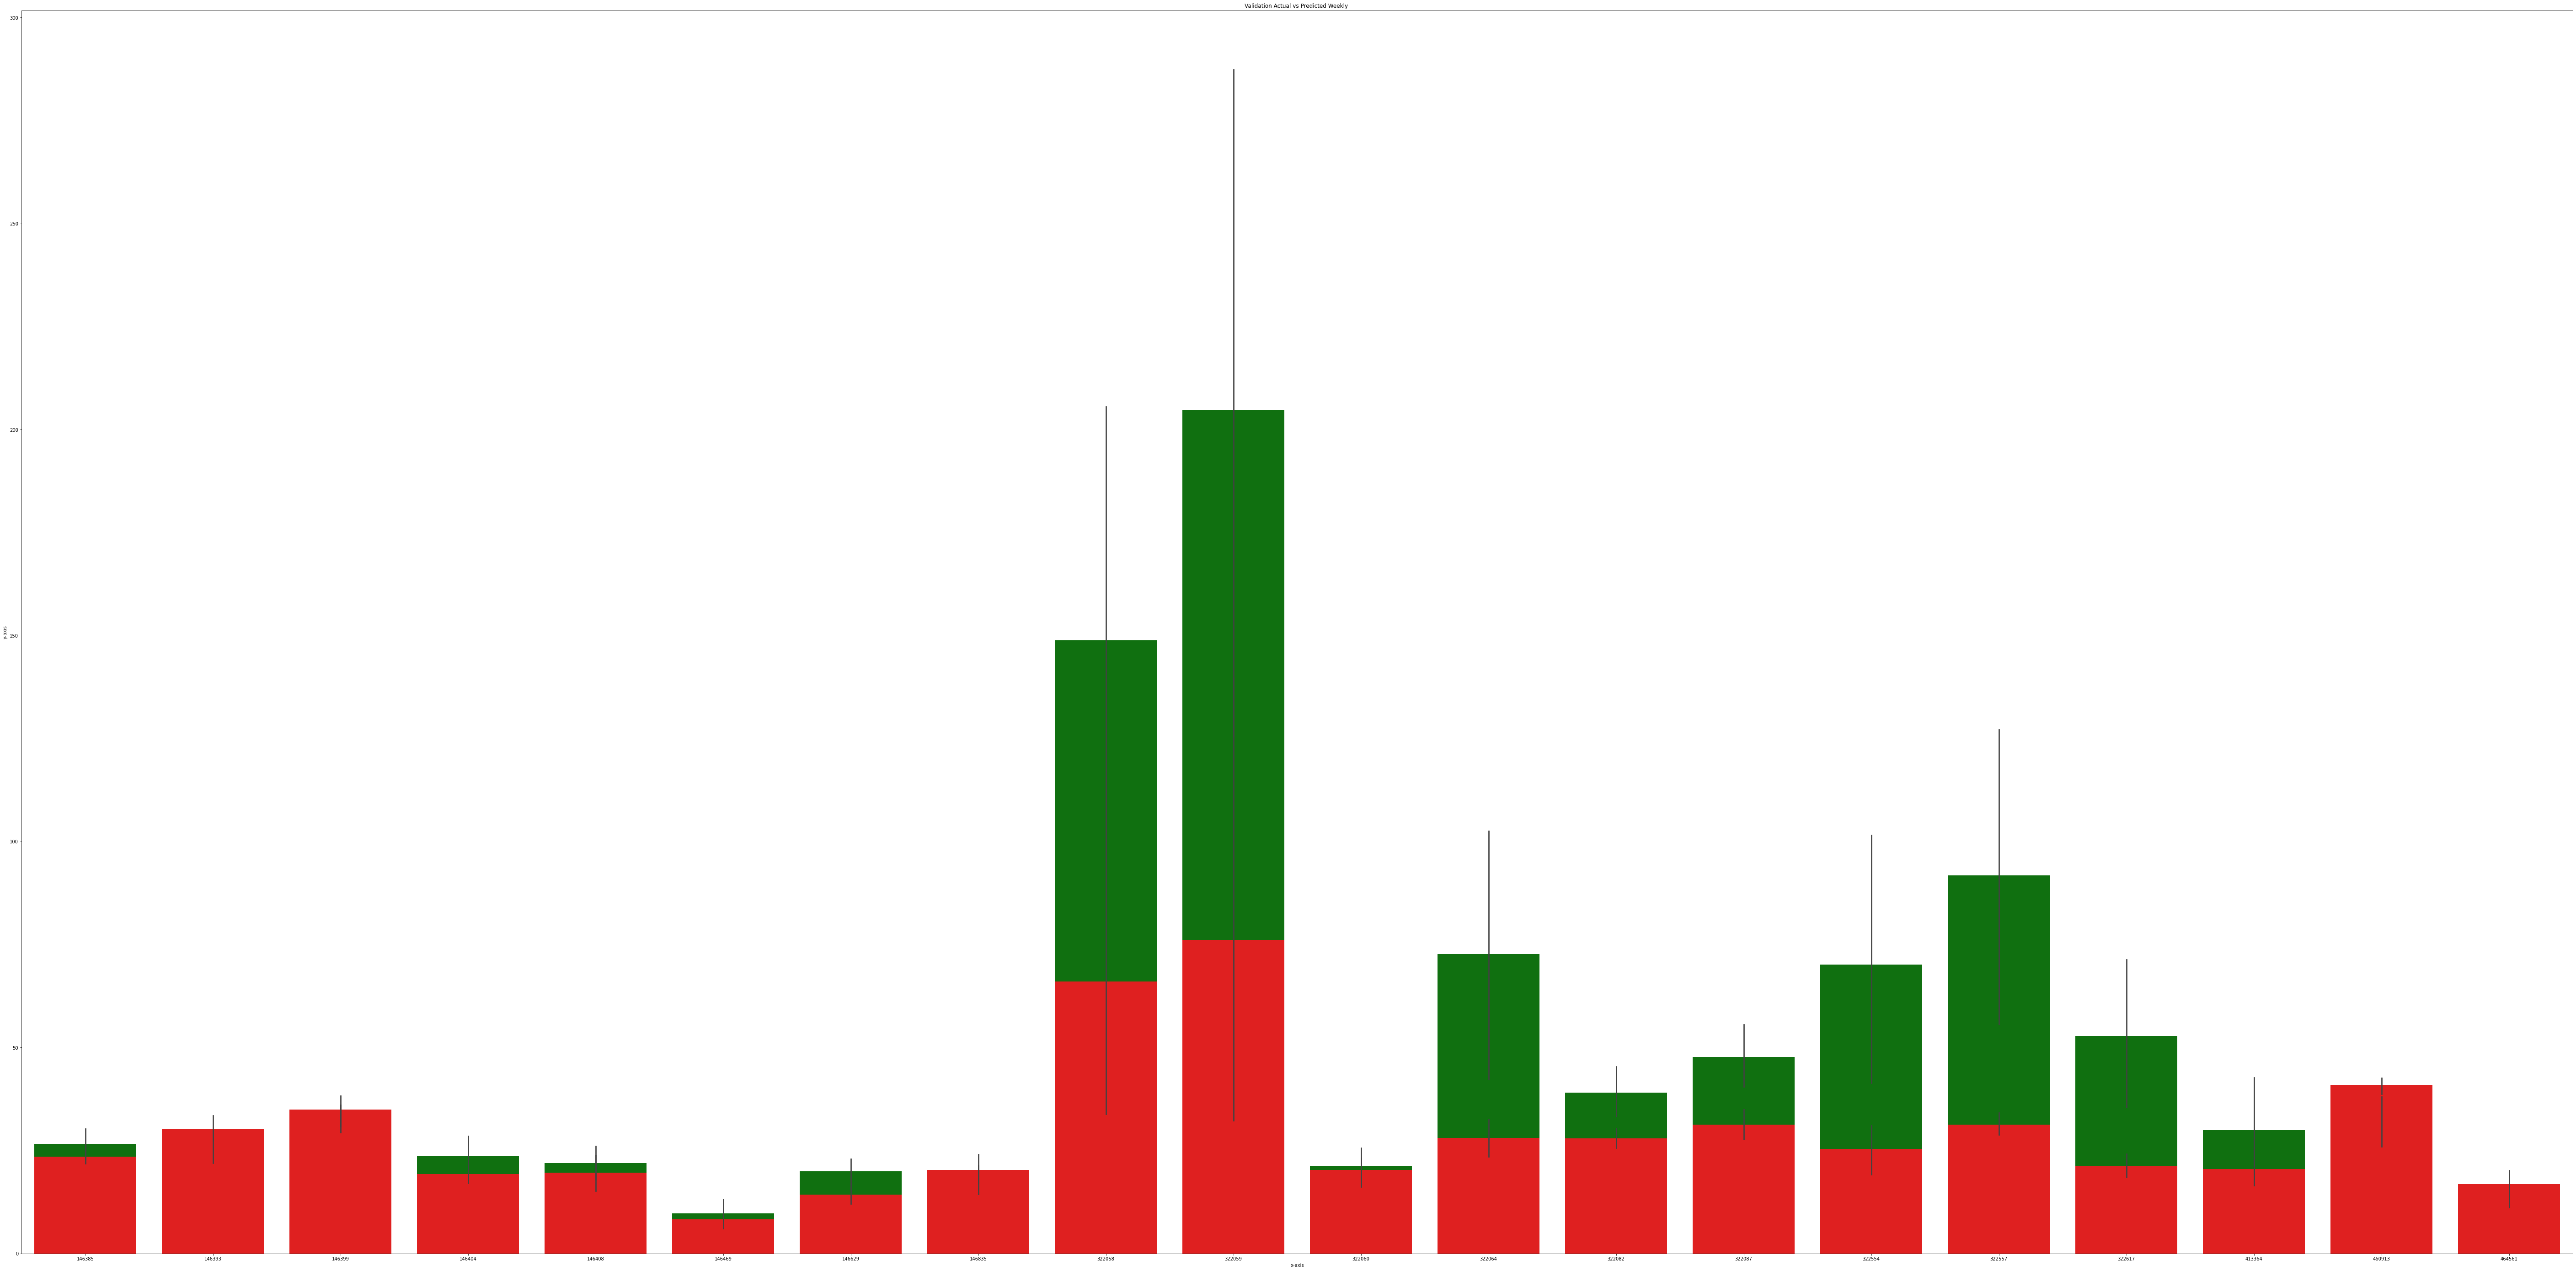

In [82]:
plt.figure(figsize=(100,50))
ax = sns.barplot(x=val_act_pred_wkly_df["csc"], y=val_act_pred_wkly_df["validation_actual"], color='g')
ax = sns.barplot(x=val_act_pred_wkly_df["csc"], y=val_act_pred_wkly_df["validation_predicted"], color='r')
 
# renaming the axes
ax.set(xlabel="x-axis", ylabel="y-axis")
plt.title("Validation Actual vs Predicted Weekly ")
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

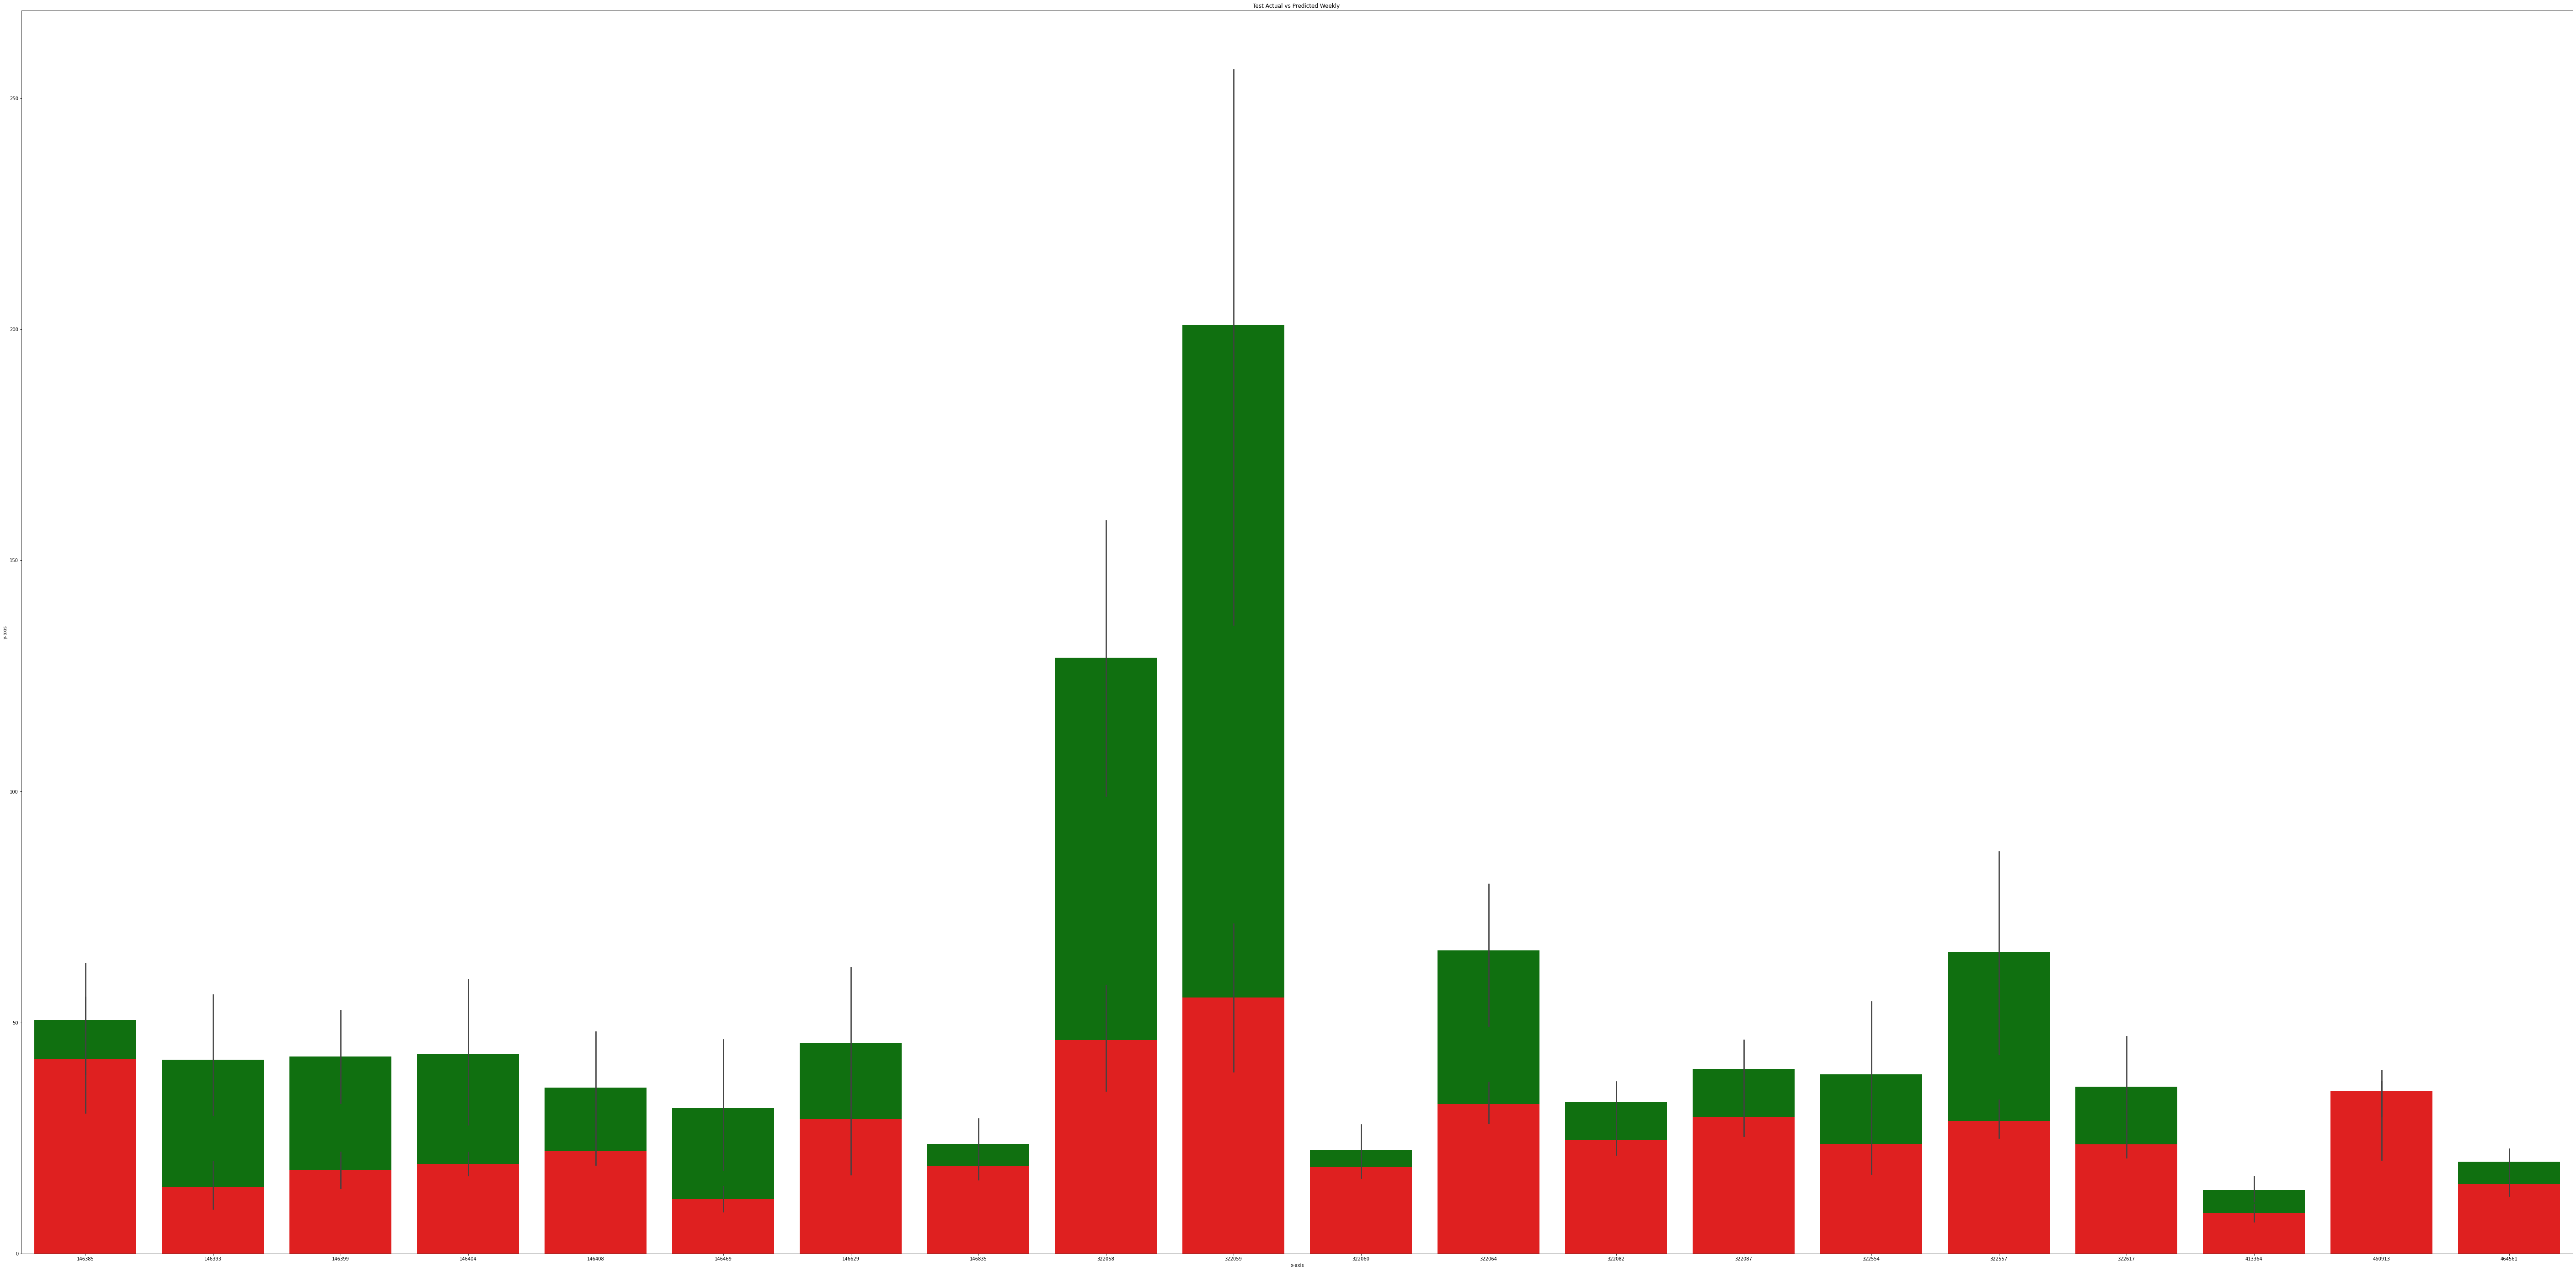

In [80]:
plt.figure(figsize=(100,50))
ax = sns.barplot(x=test_act_pred_wkly_df["csc"], y=test_act_pred_wkly_df["test_actual"], color='g')
ax = sns.barplot(x=test_act_pred_wkly_df["csc"], y=test_act_pred_wkly_df["test_predicted"], color='r')
 
# renaming the axes
ax.set(xlabel="x-axis", ylabel="y-axis")
plt.title("Test Actual vs Predicted Weekly ")
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

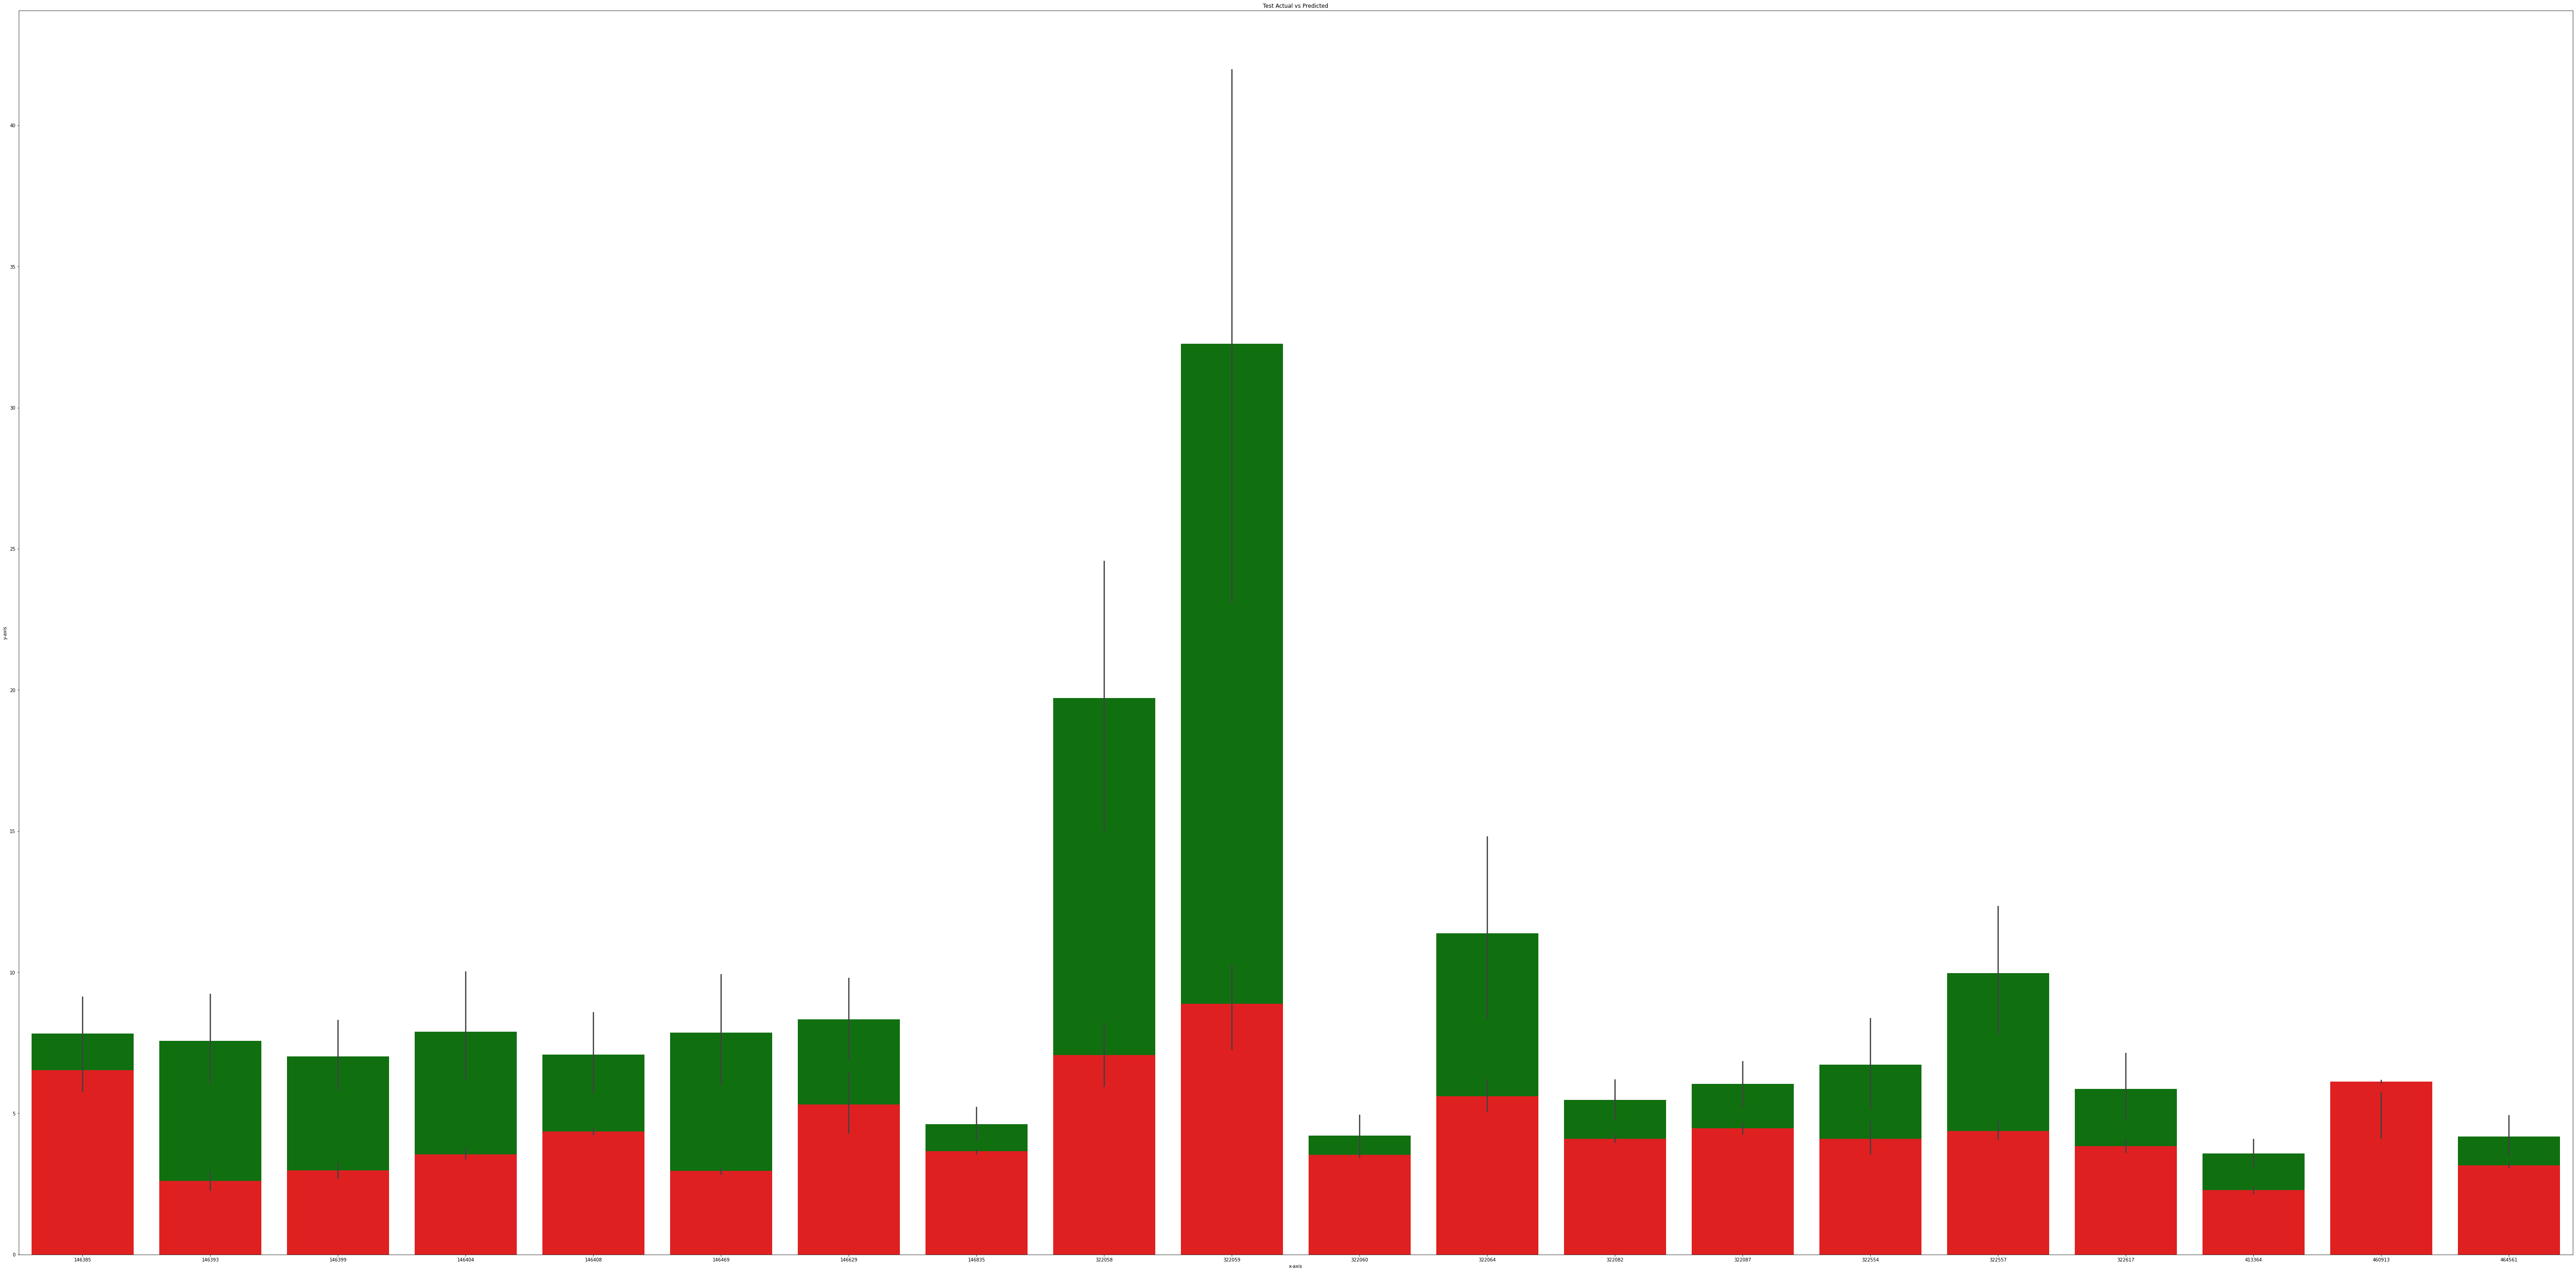

In [63]:
plt.figure(figsize=(100,50))
ax = sns.barplot(x=test_act_pred_df["csc"], y=test_act_pred_df["test_actual"], color='g')
ax = sns.barplot(x=test_act_pred_df["csc"], y=test_act_pred_df["test_predicted"], color='r')
 
# renaming the axes
ax.set(xlabel="x-axis", ylabel="y-axis")
plt.title("Test Actual vs Predicted")
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

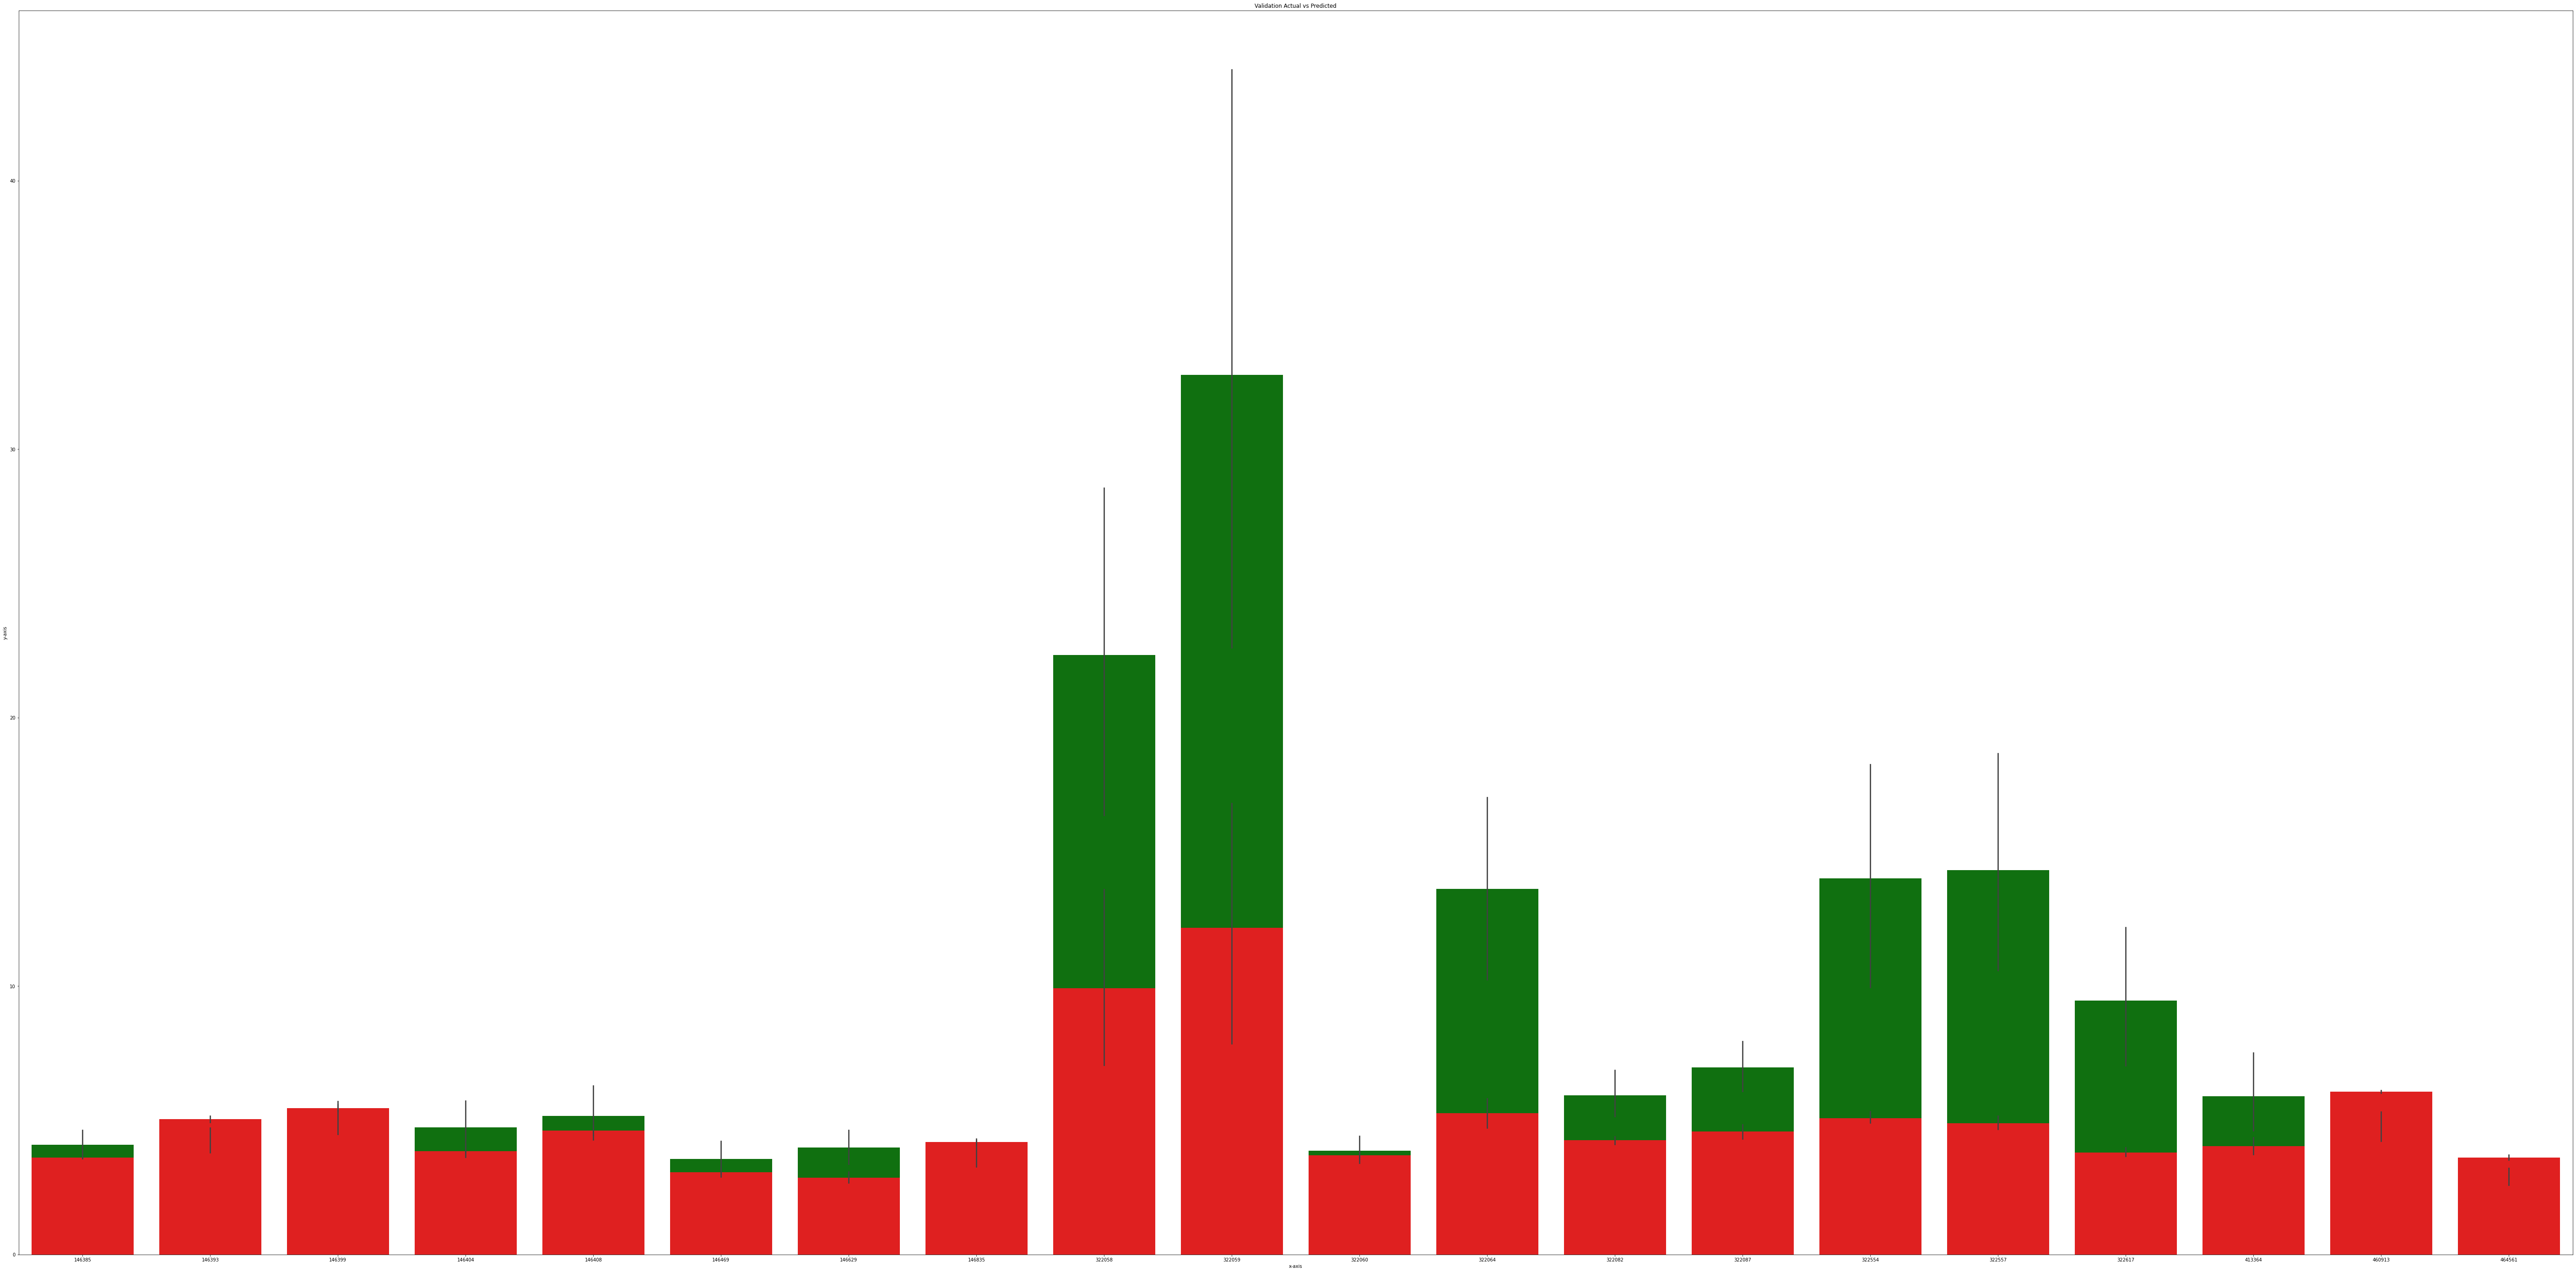

In [64]:
plt.figure(figsize=(100,50))
ax = sns.barplot(x=val_act_pred_df["csc"], y=val_act_pred_df["validation_actual"], color='g')
ax = sns.barplot(x=val_act_pred_df["csc"], y=val_act_pred_df["validation_predicted"], color='r')
 
# renaming the axes
ax.set(xlabel="x-axis", ylabel="y-axis")
plt.title("Validation Actual vs Predicted")
#plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.show()

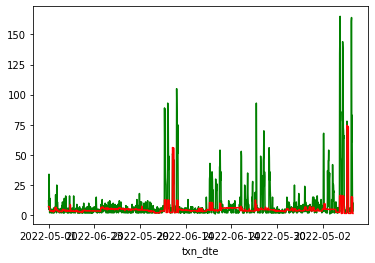

In [65]:
val_act_pred_df['validation_actual'].plot(color = 'green')
val_act_pred_df['validation_predicted'].plot(color = 'red')

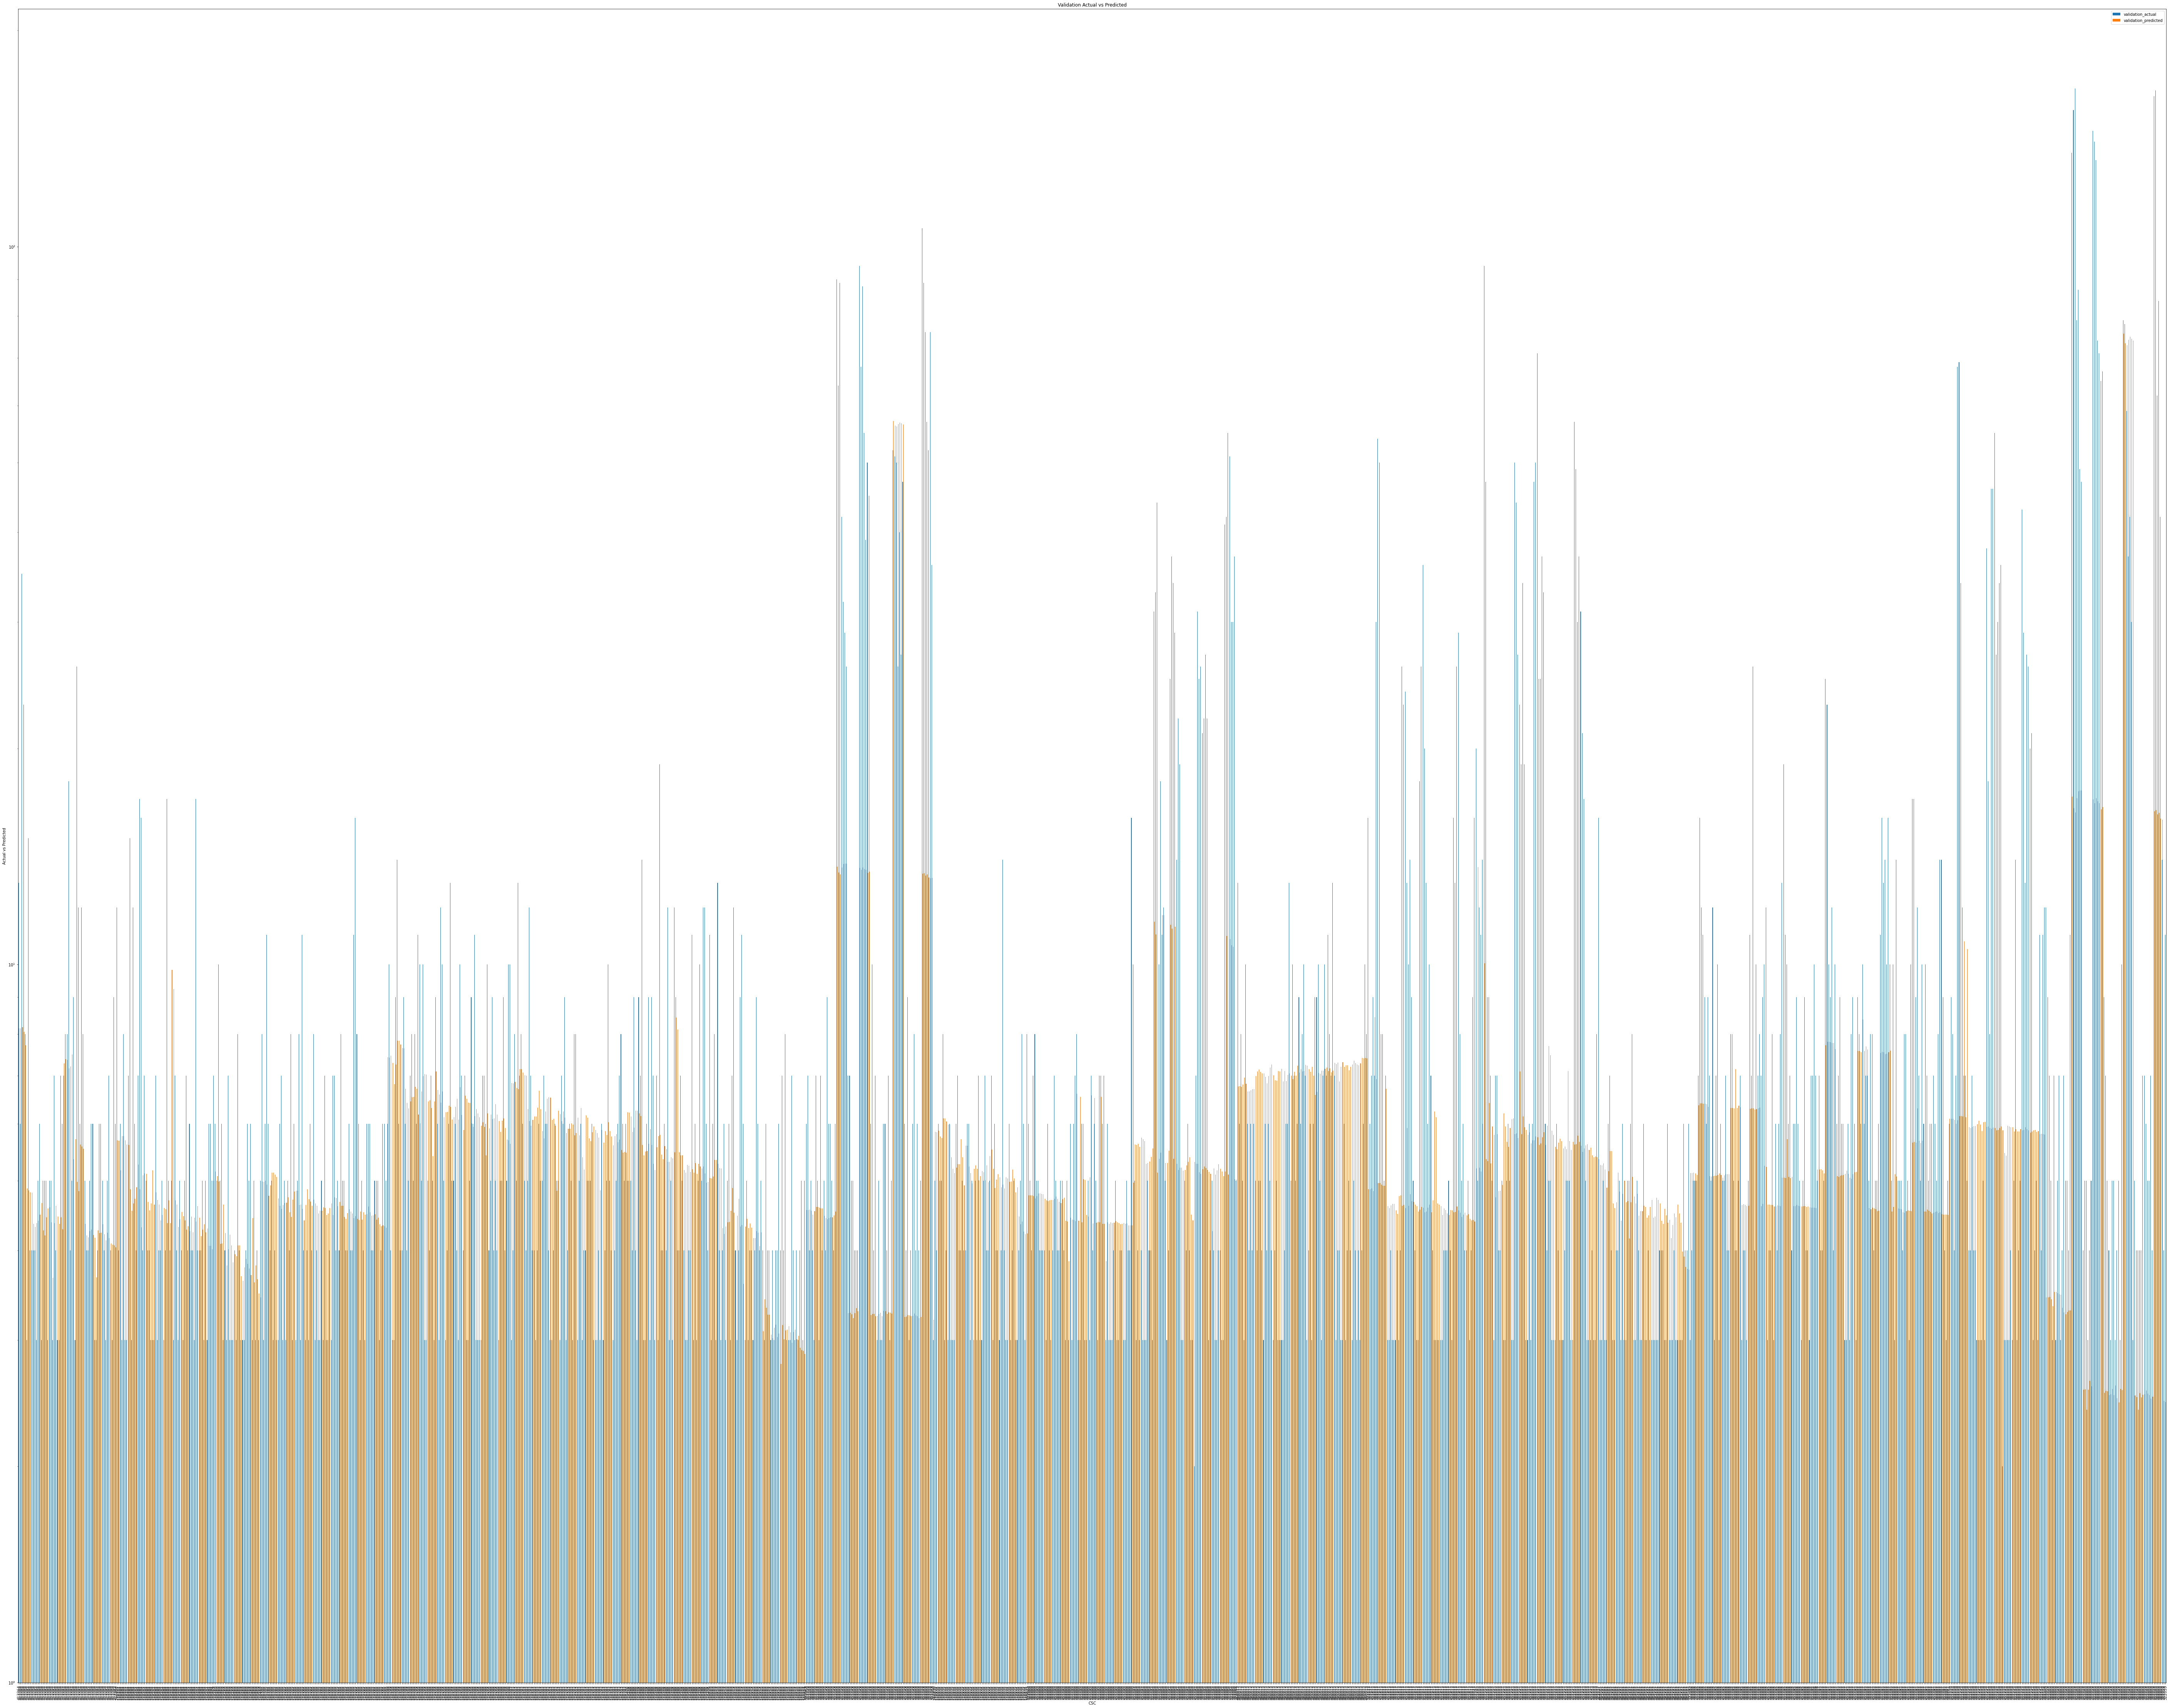

In [66]:
val_act_pred_df.plot(x="csc"
                             , y=["validation_actual"
                             , "validation_predicted"]
                             , kind ="bar"
                             , log = True
                             , figsize = (100,80)
                             , title = "Validation Actual vs Predicted"
                             , xlabel = "CSC"
                             , ylabel = "Actual vs Predicted")

Feature: 0, Score: 0.01527
Feature: 1, Score: 0.15723
Feature: 2, Score: 0.11812
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.46346
Feature: 5, Score: 0.24591


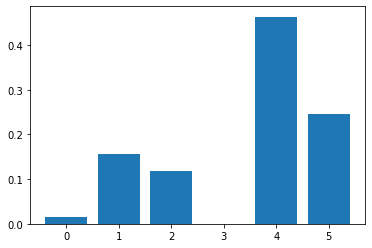

In [67]:
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
model = DecisionTreeRegressor()
# fit the model
model.fit(x, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
pyplot.show()
features = ['holiday_ind', 'consumer_selling_cd', 'smic_group_cd', 'store_id',
       'log_avg_temperature_amt', 'log_eff_price']

In [ ]:
df_txn_consolidated_case_1[['log_total_item_qty', 'eff_price', 'log_eff_price' , 'log_avg_temperature_amt']].describe()

In [ ]:
df_txn_consolidated_case_1[df_txn_consolidated_case_1.eff_price == 0].iloc[0]

In [ ]:
model_case_1_with_temp_price = ols("log_total_item_qty ~ log_eff_price + log_avg_temperature_amt", data = train).fit()
print(model_case_1_with_temp_price.summary())
print(model_case_1_with_temp_price.conf_int())

In [ ]:
train.tail()

In [ ]:
model_case_1_with_temp_price.predict(test)

In [ ]:
df_txn_consolidated_case_1.index

In [ ]:
model_case_1_with_price = ols("log_total_item_qty ~ log_eff_price", data = train).fit()
print(model_case_1_with_price.summary())
print(model_case_1_with_price.conf_int())

In [ ]:
model_case_1_with_temp = ols("log_total_item_qty ~ log_avg_temperature_amt", data = train).fit()
print(model_case_1_with_temp.summary())
print(model_case_1_with_temp.conf_int())

In [ ]:
#pd.merge(df_txn, df_weather_consolidated, how = 'inner', right_on = ['day_dt'], left_on = ['txn_dte'])

In [ ]:
'''
df_address = pd.read_csv('address.txt')
df_address.columns = [col.lower() for col in df_address.columns]
print(df_address.head())
err_addr_list = []
valid_addr_list = []
geolocator = Nominatim(user_agent='myGeocoder')
for addr in df_address.address.values.tolist():
    if addr == "":
        continue
    print("Processing input address: ", addr)
    try:
        location = geolocator.geocode(addr.strip())
        print(location.address)
        print((location.latitude, location.longitude))
        valid_addr_list.append((addr, location.latitude, location.longitude))
    except:
        err_addr_list.append(addr)
'''

In [ ]:
'''
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

# Set time period
start = datetime(2018, 1, 1)
end = datetime(2022, 12, 31)

# Create Point for Vancouver, BC
location = Point(49.2497, -123.1193, 70)

# Get daily data for 2018
data = Daily(location, start, end)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'
             ])
plt.show()
'''

In [ ]:
'''
api_key = '93a3f2dfe85a4548a02201835221910'
#https://github.com/ekapope/WorldWeatherOnline
frequency = 24
zipcode_list = list(set(df_zip.zipcode.values.tolist()))
hist_weather_data = retrieve_hist_data(api_key,
                                df_zip.zipcode.values.tolist(),
                                start,
                                end,
                                frequency,
                                location_label = False,
                                export_csv = True,
                                store_df=True)
'''